#  Analyse spectra ADR holo at AuxTel for Configuration PSF1D REBIN = 2

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : June 27th  2022
- last update : June 27th 2022

- **kernel anaconda3_auxtel** at CC or **python 3** locally


## ANalyse ADR subtraction

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

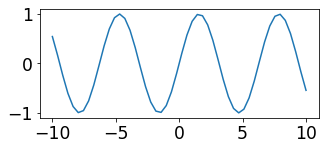

In [3]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
#pip install fpdf
#from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
string_date

'2022-07-08'

In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.8.4'

In [11]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor, dumpParameters, FullForwardModelFitWorkspace,  run_ffm_minimisation, plot_comparison_truth
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
#from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1, ATMOSPHERIC_LINES
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [12]:
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [13]:
from time import sleep

In [14]:
from astropy.time import Time
import astropy.units as u

In [15]:
import pickle

# Function

In [16]:
def file_tag_forsorting(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^exposure_.*([0-9][0-9][0-9][0-9][0-9])_postisrccd.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None


In [17]:
def subdir_tag_forsorting(subdir):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('.*([0-9][0-9][0-9][0-9][0-9])$', subdir)
    if len(m)>0:
        return m[0]
    else:
        return None


In [18]:
file_tag_forsorting('exposure_2022031600330_postisrccd.fits')

'00330'

In [19]:
subdir_tag_forsorting('2022031600330')

'00330'

# Config

In [20]:
# path index for each month
DATE="20220317"
#DATE="20211104"
filterdispersername = "empty~holo4_003"
#filterdispersername = "BG40~holo4_003"
imagemode = "postISRCCD"
#imagemode = "unflattened"

In [21]:
version="v5.0"

In [22]:
# Choose the config filename
list_of_spectractorconfigfiles= ['auxtel_config_holo_DECONVOLUTION_PSF1D.ini' ,
                                 'auxtel_config_holo_DECONVOLUTION_PSF2D.ini',
                                 'auxtel_config_holo_DECONVOLUTION_FFM.ini',
                                 'auxtel_config_holo_DECONVOLUTION_PSF2DFFM.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1D.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF2D.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1DrotA.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1DrotB.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1DrotC.ini',
                                 'auxtel_config_holo_DECONVOLUTION_REBIN2PSF1DrotD.ini']
                                 
                                 
config_idx = 4
configfilename= os.path.join("./config",list_of_spectractorconfigfiles[config_idx])
#configdir = (list_of_spectractorconfigfiles[config_idx].split("_")[-1]).split(".") [0]
configdir = "config_" + (list_of_spectractorconfigfiles[config_idx].split("auxtel_config_holo_")[-1]).split(".") [0]

In [23]:
configdir 

'config_DECONVOLUTION_REBIN2PSF1D'

In [24]:
load_config(configfilename)

In [25]:
parameters.LAMBDA_MAX=700
parameters.LAMBDA_MIN=300

In [26]:
dumpParameters()

ASTROMETRYNET_DIR 
BGD_ORDER 1
CALIB_BGD_NPARAMS 4
CALIB_BGD_ORDER 3
CALIB_BGD_WIDTH 15
CALIB_PEAK_WIDTH 7
CALIB_SAVGOL_ORDER 2
CALIB_SAVGOL_WINDOW 5
CCD_ARCSEC2RADIANS 4.84813681109536e-06
CCD_GAIN 1.1
CCD_IMSIZE 2048
CCD_MAXADU 170000
CCD_PIXEL2ARCSEC 0.1904
CCD_PIXEL2MM 0.02
CCD_REBIN 2
CONFIG_DIR /sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/../config/
DEBUG False
DEBUG_LOGGING False
DISPERSER_DIR /sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/dispersers/
DISPLAY False
DISTANCE2CCD 175
DISTANCE2CCD_ERR 0.75
FGB37 {'label': 'FGB37', 'min': 350, 'max': 750}
FILTERS [{'label': 'RG715', 'min': 690, 'max': 1100}, {'label': 'FGB37', 'min': 350, 'max': 750}, {'label': 'Halfa', 'min': 0.0006431, 'max': 0.0006686999999999999}, {'label': 'Z-Gunn', 'min': 800, 'max': 1100}]
FLAM_TO_ADURATE 5175865186660.421
GRATING_ORDER_2OVER1 0.1
GROOVES_PER_MM 350
HAL

In [27]:
configmode = list_of_spectractorconfigfiles[config_idx].split("auxtel_config_holo_DECONVOLUTION_")[-1].split(".") [0]
configmode

'REBIN2PSF1D'

# Path

In [28]:
HOSTCC=True

In [29]:
# Set path depending on which computer running (according HOSTCC)
if HOSTCC:
    path_auxtel="/sps/lsst/groups/auxtel"
    path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/"+filterdispersername+"/"+DATE)
    if configdir == "":
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+DATE)
    else:
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir+"/"+DATE)
        path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir)
        path_toptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername)
        path_toptoptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode)

else:
    path_auxtel="/Users/sylvie/DATA/AuxTelData2022"
    path_spectractor=os.path.join(path_auxtel,"/Users/sylvie/MacOSX/GitHub/LSST/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/"+filterdispersername+"/"+DATE)
    if configdir == "":
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+DATE)
    else:
        path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir+"/"+DATE)
        path_topoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername+"/"+configdir)
        path_toptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode+"/"+filterdispersername)
        path_toptoptopoutput_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/"+imagemode)


In [30]:
path_output_spectractor

'/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317'

In [31]:
! ls -l $path_output_spectractor

total 0
drwxrws--- 1 dagoret lsst 2 Jun 28 14:36 2022031700237


In [32]:
# standard configuration for spectractor
#config = os.path.join(path_spectractor_config,"auxtel.ini")
#config=os.path.join("./config",configfilename)
config=configfilename
print(f">>>>> Spectractor configuration filename : {configfilename}")

>>>>> Spectractor configuration filename : ./config/auxtel_config_holo_DECONVOLUTION_REBIN2PSF1D.ini


In [33]:
load_config(configfilename)

## Logbook for file selection

In [34]:
filename_logbook='logbooks/auxtellogbook_'+filterdispersername+"_"+DATE+'_' + version+'.csv'

In [35]:
df=pd.read_csv(filename_logbook,index_col=0)

In [36]:
pd.set_option('display.max_rows', None)

In [37]:
df

index                     date  \
0       0  2022-03-18T00:51:03.112   
1       1  2022-03-18T00:51:36.190   
2       2  2022-03-18T00:54:30.463   
3       3  2022-03-18T00:55:03.377   
4       4  2022-03-18T00:58:01.707   
5       5  2022-03-18T00:58:34.835   
6       6  2022-03-18T01:01:32.859   
7       7  2022-03-18T01:02:05.775   
8       8  2022-03-18T01:05:03.839   
9       9  2022-03-18T01:05:36.766   
10     10  2022-03-18T01:08:32.232   
11     11  2022-03-18T01:09:05.133   
12     12  2022-03-18T01:12:00.164   
13     13  2022-03-18T01:12:33.079   
14     14  2022-03-18T01:15:32.735   
15     15  2022-03-18T01:16:05.627   
16     16  2022-03-18T01:18:59.663   
17     17  2022-03-18T01:19:32.577   
18     18  2022-03-18T01:22:30.386   
19     19  2022-03-18T01:23:03.286   
20     20  2022-03-18T01:43:39.078   
21     21  2022-03-18T01:44:11.982   
22     22  2022-03-18T01:47:06.515   
23     23  2022-03-18T01:47:39.407   
24     24  2022-03-18T01:50:33.593   
25     25  2022-03-18T01:51:06.516   
26     26  2022-03-18T01:54:00.883   
27     27  2022-03-18T01:54:33.856   
28     28  2022-03-18T01:57:30.505   
29     29  2022-03-18T01:58:03.446   
30     30  2022-03-18T02:01:00.181   
31     31  2022-03-18T02:01:33.339   
32     32  2022-03-18T02:04:30.946   
33     33  2022-03-18T02:05:03.843   
34     34  2022-03-18T02:08:03.232   
35     35  2022-03-18T02:08:36.262   
36     36  2022-03-18T02:11:34.200   
37     37  2022-03-18T02:12:07.156   
38     38  2022-03-18T02:15:00.952   
39     39  2022-03-18T02:15:33.886   
40     40  2022-03-18T02:33:14.260   
41     41  2022-03-18T02:33:47.167   
42     42  2022-03-18T02:36:45.029   
43     43  2022-03-18T02:37:17.962   
44     44  2022-03-18T02:40:14.985   
45     45  2022-03-18T02:40:47.930   
46     46  2022-03-18T02:43:46.361   
47     47  2022-03-18T02:44:19.255   
48     48  2022-03-18T02:47:16.976   
49     49  2022-03-18T02:47:49.912   
50     50  2022-03-18T02:50:52.460   
51     51  2022-03-18T02:51:25.626   
52     52  2022-03-18T03:08:55.717   
53     53  2022-03-18T03:09:28.629   
54     54  2022-03-18T03:13:08.467   
55     55  2022-03-18T03:13:41.360   
56     56  2022-03-18T03:17:20.920   
57     57  2022-03-18T03:17:53.934   
58     58  2022-03-18T03:21:41.018   
59     59  2022-03-18T03:22:14.022   

                                                 path  \
0   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
1   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
2   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
3   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
4   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
5   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
6   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
7   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
8   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
9   /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
10  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
11  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
12  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
13  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
14  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
15  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
16  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
17  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
18  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
19  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
20  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
21  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
22  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
23  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
24  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
25  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
26  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
27  /sps/lsst/groups/auxtel/data/2022/empty~holo4_...   
28  /sps/lsst/groups/auxtel/data

## Selection of input files

In [38]:
# Do not consider flag
#df_good=df[df["quality"]==1]

In [39]:
df_good=df
df_good["quality"] = 1

In [40]:
for spectra_file in df_good["file"]:
    print(spectra_file)

exposure_2022031700237_postisrccd.fits
exposure_2022031700238_postisrccd.fits
exposure_2022031700244_postisrccd.fits
exposure_2022031700245_postisrccd.fits
exposure_2022031700251_postisrccd.fits
exposure_2022031700252_postisrccd.fits
exposure_2022031700258_postisrccd.fits
exposure_2022031700259_postisrccd.fits
exposure_2022031700265_postisrccd.fits
exposure_2022031700266_postisrccd.fits
exposure_2022031700272_postisrccd.fits
exposure_2022031700273_postisrccd.fits
exposure_2022031700279_postisrccd.fits
exposure_2022031700280_postisrccd.fits
exposure_2022031700286_postisrccd.fits
exposure_2022031700287_postisrccd.fits
exposure_2022031700293_postisrccd.fits
exposure_2022031700294_postisrccd.fits
exposure_2022031700300_postisrccd.fits
exposure_2022031700301_postisrccd.fits
exposure_2022031700309_postisrccd.fits
exposure_2022031700310_postisrccd.fits
exposure_2022031700316_postisrccd.fits
exposure_2022031700317_postisrccd.fits
exposure_2022031700323_postisrccd.fits
exposure_2022031700324_po

## Selection of Spectractor output files

In [41]:
# total number of exposures
NBEXP=0
# total number of exposures without dir
NBEXPNODIR=0
# total number of exposures with dir
NBEXPWTHDIR=0
# total number of exposures with plots
NBEXPWTHPLT=0
# total number of exposures with spectra
NBEXPWTHSPEC=0

# list of exposures
LISTNUM=[]
# list of exposure without dir (not run spectraction)
LISTNUMNODIR=[]
# list of exposure with dir (spectraction has been run)
LISTNUMWTHDIR=[]
# list of exposures with plots (Spectractor has run up to some point)
LISTNUMWTHPLOTS=[]
# list of exposures with spectraction output (Spectractor has completed)
LISTNUMWTHSPECTR=[]

# list of selected spectra path
List_of_spectra_path=[]

In [42]:
list_of_files=os.listdir(path_output_spectractor)
list_of_files=sorted(list_of_files)


print("list of subdir found ",list_of_files)

for subdir in list_of_files:
    
    
    #tag = file_tag_forsorting(subdir)
    tag = subdir_tag_forsorting(subdir)
    
        
    print(tag)    
    #if tag is not None and int(tag)<317:
    #    continue
    if tag is None :
        continue
  
    
    
    fulldir=os.path.join(path_output_spectractor,subdir)



    if not os.path.isdir(fulldir):
        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is not a directory".format(subdir))
        

        NBEXPNODIR+=1


    else:

        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is a directory".format(subdir))

        tagname=subdir_tag_forsorting(subdir)
        print("tagname= {}".format(tagname))
        #targetname=file_target(subdir)
        #print("targetname= {}".format(targetname))
        



        NBEXP += 1
        LISTNUM.append(tagname)



        dir_plots=os.path.join(fulldir,"plots")
        dir_spectration = os.path.join(fulldir, "basespec")

        flag_empty1 = True
        flag_empty2 = True


        if os.path.isdir(dir_plots):
            if any(os.scandir(dir_plots)):
                print("dir_plots is not empty")
                NBEXPWTHPLT+=1
                LISTNUMWTHPLOTS.append(tagname)
                flag_empty1 = False

            else:
                print("dir_plots is empty")


        if os.path.isdir(dir_spectration):
            if any(os.scandir(dir_spectration)):
                print("dir_spectration is not empty")
                NBEXPWTHSPEC+=1
                LISTNUMWTHSPECTR.append(tagname)
                flag_empty2 = False
                List_of_spectra_path.append(dir_spectration)

            else:
                print("dir_spectration is empty")

        if flag_empty1 and flag_empty2 :
            NBEXPNODIR+=1
            LISTNUMNODIR.append(tagname)
        else:
            NBEXPWTHDIR += 1
            LISTNUMWTHDIR.append(tagname)



print("-----------------------------------------------------------------")


#LISTNUM=sorted(LISTNUM)
#LISTNUMNODIR=sorted(LISTNUMNODIR)
#LISTNUMWTHDIR=sorted(LISTNUMWTHDIR)
#LISTNUMWTHPLOTS=sorted(LISTNUMWTHPLOTS)
#LISTNUMWTHSPECTR=sorted(LISTNUMWTHSPECTR)
List_of_spectra_path=sorted(List_of_spectra_path)

print("Full list of Exposures : .......................{}".format(LISTNUM))
print("Full list of Exposures without output dir: .....{}".format(LISTNUMNODIR))
print("Full list of Exposures with output dir: ....... {}".format(LISTNUMWTHDIR))
print("Full list of Exposures with output plots: ..... {}".format(LISTNUMWTHPLOTS))
print("Full list of Exposures with output spectra: ....{}".format(LISTNUMWTHSPECTR))




print("Total number of exposures : .....................{}".format(NBEXP))
print("Total number of exposures without dir : .........{}".format(NBEXPNODIR))
print("Total number of exposures with dir :.............{}".format(NBEXPWTHDIR))
print("Total number of exposures with plots : ..........{}".format(NBEXPWTHPLT))
print("Total number of exposures with spectra: .........{}".format(NBEXPWTHSPEC))


list of subdir found  ['2022031700237']
00237
---------------------------------------------
2022031700237  	   00237
2022031700237 is a directory
tagname= 00237
dir_plots is not empty
dir_spectration is not empty
-----------------------------------------------------------------
Full list of Exposures : .......................['00237']
Full list of Exposures without output dir: .....[]
Full list of Exposures with output dir: ....... ['00237']
Full list of Exposures with output plots: ..... ['00237']
Full list of Exposures with output spectra: ....['00237']
Total number of exposures : .....................1
Total number of exposures without dir : .........0
Total number of exposures with dir :.............1
Total number of exposures with plots : ..........1
Total number of exposures with spectra: .........1


In [43]:
#dir_spectra="outputs_reprocess"
print(List_of_spectra_path)

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec']


In [44]:
config

'./config/auxtel_config_holo_DECONVOLUTION_REBIN2PSF1D.ini'

## Extraction of spectra

In [45]:
all_files_spectra = []
all_files_spectrogram = []
all_files_lines = []
all_files_table = []

# loop on topdir
for dir_spectra in List_of_spectra_path:
    for filename in os.listdir(dir_spectra):
        if re.search("_spectrum.fits$",filename):
            the_file_spectrum=os.path.join(dir_spectra,filename)
            all_files_spectra.append(the_file_spectrum)
            the_file_spectrogram=the_file_spectrum.replace("_spectrum","_spectrogram")
            all_files_spectrogram.append(the_file_spectrogram)
            the_file_lines=the_file_spectrum.replace("_spectrum.fits","_lines.csv")
            all_files_lines.append(the_file_lines)
            the_file_table=the_file_spectrum.replace("_spectrum.fits","_table.csv")
            all_files_table.append(the_file_table)
    

In [46]:
all_files_spectra[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum.fits']

In [47]:
all_files_spectrogram[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrogram.fits']

In [48]:
all_files_lines[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_lines.csv']

In [49]:
all_files_table[:3] 

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_table.csv']

## Selection of good spectra

In [50]:
all_good_spectra_spectrum_files = sorted(all_files_spectra)

In [51]:
N=len(all_good_spectra_spectrum_files)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

## All Spectra

In [52]:
all_num=[]
idx=0
for fullfilename in all_good_spectra_spectrum_files:
    filename= os.path.basename(fullfilename)
    tag=file_tag_forsorting(filename.split(".")[0])
    all_num.append(tag)
    idx+=1
    
    

In [53]:
if False:
    parameters.DISPLAY=True

    FLAG_ORDER2 = True

    infos = []
    all_lambdas=[]
    all_data=[]
    all_data_err=[]

    if FLAG_ORDER2:
        all_lambdas_order2=[]
        all_data_order2=[]
        all_data_err_order2=[]

    all_num=[]
    all_figs = []


    idx=0
    for fullfilename in all_good_spectra_spectrum_files:
    
        filename = os.path.basename(fullfilename)
        print(idx,")",filename," ",fullfilename)
    
    
        fig=plt.figure(figsize=(16,4))
        ax1 = fig.add_subplot(1, 2, 1)
    
        filename= os.path.basename(fullfilename)
        tag=file_tag_forsorting(filename.split(".")[0])
        all_num.append(tag)
    
   
     
        s=Spectrum(fullfilename, config=config,fast_load=False)
        label=filename.split('.')[0]+" "
        s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    
        all_lambdas.append(s.lambdas)
        all_data.append(s.data)
        all_data_err.append(s.err)
    
        if FLAG_ORDER2:
            all_lambdas_order2.append(s.lambdas_order2)
            all_data_order2.append(s.data_order2)
            all_data_err_order2.append(s.err_order2)
    
        ax2 = fig.add_subplot(1, 2, 2)
    
        fullfilename2=all_files_spectrogram[idx]
    
        s.load_spectrogram(fullfilename2)
        s.plot_spectrogram(ax=ax2,scale="log")
    
    
        infos.append([idx,s.target.label,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
    
    
        plt.show()
        all_figs.append(fig)
    
        idx+=1
    

## View one spectrum

0 ) exposure_2022031700237_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum.fits


2022-07-08 11:09:40  astropy    _showwarning         WARNING AstropyDeprecationWarning: The update_default_config function is deprecated and may be removed in a future version.


set date_obs to 2022-03-18T00:50:48.964
set expo to 20.0
set airmass to 1.11445296512311
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to -0.28
set dec to -32.3064444444444
set hour_angle to 30.73762446363224
set temperature to 8.9
set pressure to 743.45
set humidity to 48.0
set lambda_ref to 631.9145079684116
set parallactic_angle to 93.74272252137011


2022-07-08 11:09:40  astropy    _showwarning         WARNING AstropyDeprecationWarning: "pedantic" was deprecated in version 5.0 and will be removed in a future version. Use argument "verify" instead.


target_name = mu.col, Selected object name for Simbad : mu. Col
 MAIN_ID        RA           DEC      ...  Z_VALUE  SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                           
--------- ------------- ------------- ... --------- ----------------
* mu. Col 05 45 59.8950 -32 18 23.162 ... 0.0003640                1


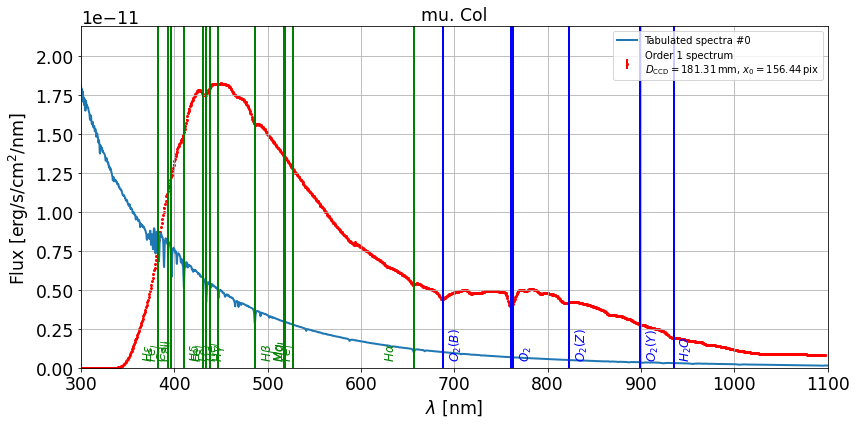

In [54]:
idx=0

fullfilename = all_good_spectra_spectrum_files[idx]
    
filename = os.path.basename(fullfilename)
print(idx,")",filename," ",fullfilename)
    
    
fig=plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 1, 1)
    
filename= os.path.basename(fullfilename)
tag=file_tag_forsorting(filename.split(".")[0])
all_num.append(tag)
    
   
     
s=Spectrum(fullfilename, config=config,fast_load=False)
label=filename.split('.')[0]+" "
#s.plot_spectrum(ax=ax1,force_lines=True,label=label)
s.plot_spectrum(ax=ax1,force_lines=True)
    
    
#ax2 = fig.add_subplot(1, 2, 2)
    
#fullfilename2=all_files_spectrogram[idx]
    
#s.load_spectrogram(fullfilename2)
#s.plot_spectrogram(ax=ax2,scale="log")
    

plt.show()
    

# Work on FFM

In [55]:
from spectractor.simulation.adr import adr_calib, flip_and_rotate_adr_to_image_xy_coordinates

In [56]:
fig_FFMpoutputdir = "fig_FFM_" + configdir
if not os.path.exists(fig_FFMpoutputdir):
        os.makedirs(fig_FFMpoutputdir)

In [57]:
parameters.DISPLAY = True
parameters.DEBUG = True
parameters.VERBOSE = True
parameters.LSST_SAVEFIGPATH = fig_FFMpoutputdir

In [58]:
# Want to plot some information
# if 'LBDAS_T' in spec.header: plot_comparison_truth(spec, w)
s.header['LBDAS_T'] = True

In [59]:
def showfitparameter(w):
    N1= len(w.input_labels) 
    N2 = len(w.p)
    assert N1 == N2
    
    for idx in range(N1):
        tag=w.input_labels[idx]
        val=w.p[idx]
        print(f"{idx} :: {tag} = {val}")

In [60]:
w = FullForwardModelFitWorkspace(s, verbose=parameters.VERBOSE, plot=True, live_fit=True,
                                         amplitude_priors_method="spectrum")

2022-07-08 11:09:44  FullForwardModelFitWorkspace __init__             INFO   
	Full forward model fitting with regularisation parameter r=1.


In [61]:
showfitparameter(w)

0 :: A2 = 1.0
1 :: D_CCD [mm] = 181.312826436761
2 :: shift_x [pix] = -0.1511882604364546
3 :: shift_y [pix] = 0.0
4 :: angle [deg] = -0.28
5 :: B = 1.0
6 :: R = 0.0
7 :: P [hPa] = 743.45
8 :: T [Celsius] = 8.9
9 :: x_c_0 = 999.1189912121253
10 :: x_c_1 = 575.4931279665329
11 :: x_c_2 = 0.0
12 :: y_c_0 = 3.574947098802857
13 :: y_c_1 = 2.73771583866332
14 :: y_c_2 = -0.7069567876125603
15 :: gamma_0 = 6.178185558626659
16 :: gamma_1 = -1.5628450840965327
17 :: gamma_2 = 1.4731948252661538
18 :: alpha_0 = 1.8102056359892473
19 :: alpha_1 = -0.3970153722375538
20 :: alpha_2 = 0.2548527865367822
21 :: saturation_0 = 8499.687172396581


2022-07-08 11:10:19  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=2.2837e+08 initial chisq_red=5476.5
		 Line search: alpha_min=2.08 iter=0 funcalls=5
	Parameter shifts: [ 8.25585851e+00 -3.19189015e-04]
	New parameters: [ 8.25585851 -0.28031919]
	Final cost=6.845e+07 final chisq_red=1641.5 computed in 29.70s
2022-07-08 11:10:24  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-07-08 11:10:25  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-07-08 11:10:55  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=6.845e+07 initial chisq_red=1641.5
		 Line search: alpha_min=1 iter=1 funcalls=5
	Parameter shifts: [-8.88173243  0.53767028]
	New parameters: [-0.62587392  0.25735109]
	Final cost=2.3645e+07 final chisq_red=567.04 computed in 28.98s
2022-07-08 11:11:00

	 >>>>> cov =  [[ 2.87542384e-07 -1.02656934e-08]
 [-1.02656934e-08  6.67277358e-10]] >>>>  cov.shape =  (2, 2)


2022-07-08 11:12:16  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -0.5052 +0.0005 -0.0005
	angle [deg]: 0.25892 +3e-05 -3e-05
	
2022-07-08 11:12:20  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-07-08 11:12:23  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-07-08 11:12:24  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_correlation.pdf.
2022-07-08 11:12:24  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/parameters_correlation.pdf.


>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 2.87542384e-07 -1.02656934e-08]
 [-1.02656934e-08  6.67277358e-10]]  type =  <class 'numpy.ndarray'>  shape =  (2, 2)
>>>> 	 	  k =  0
>>>>> 	 save_parameters_summary ::  k =  0  ,  ip =  3  p[ip] =  -0.5051572471552435  , label =  shift_y [pix]  , cov =  2.8754238403013665e-07
>>>> 	 	  k =  1
>>>>> 	 save_parameters_summary ::  k =  1  ,  ip =  4  p[ip] =  0.2589236294891178  , label =  angle [deg]  , cov =  6.672773581160957e-10
>>>> 	 	  k =  2
>>>>> 	 save_parameters_summary ::  SKIP k =  2  >=  kmax =  2
>>>> 	 	  k =  3
>>>>> 	 save_parameters_summary ::  SKIP k =  3  >=  kmax =  2
>>>> 	 	  k =  4
>>>>> 	 save_parameters_summary ::  SKIP k =  4  >=  kmax =  2
>>>> 	 	  k 

2022-07-08 11:12:24  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt.
2022-07-08 11:12:24  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_fitting.txt.
2022-07-08 11:12:30  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-07-08 11:12:31  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-07-08 11:12:32  spectractor.extractor.extractor run_ffm_minimisation INFO  

	 >>>>> cov =  [[ 1.81566982e-06 -8.99009058e-08  8.64969582e-04  1.31191463e-04
  -1.78061319e-07 -4.40721668e-07  3.00464955e-07 -4.29571746e-08
  -1.15753765e-07  7.95810876e-08]
 [-8.99009058e-08  4.90271793e-09 -3.29261383e-05 -4.91704321e-06
   6.92501038e-09  2.02329197e-08 -1.25502942e-08  1.72457579e-09
   5.72990982e-09 -3.45919309e-09]
 [ 8.64969582e-04 -3.29261383e-05  1.80387639e+02  7.56609746e+01
  -3.84541251e-04 -1.20522781e-04 -2.68871404e-04 -9.59931585e-05
  -1.60123401e-05 -1.22271591e-04]
 [ 1.31191463e-04 -4.91704321e-06  7.56609746e+01  3.18020620e+01
  -1.16694734e-04  6.43564338e-05 -1.95417000e-04 -3.06487506e-05
   2.16550172e-05 -7.35809248e-05]
 [-1.78061319e-07  6.92501038e-09 -3.84541251e-04 -1.16694734e-04
   4.41523303e-06  1.33040937e-06  7.11911606e-06  1.39026477e-06
   3.47982988e-07  2.23355655e-06]
 [-4.40721668e-07  2.02329197e-08 -1.20522781e-04  6.43564338e-05
   1.33040937e-06  1.50178418e-05  6.41327298e-07  3.47753236e-07
   4.74155119e-06 

2022-07-08 11:19:14  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -0.390 +0.001 -0.001
	angle [deg]: 0.23886 +7e-05 -7e-05
	P [hPa]: 688 +13 -13
	T [Celsius]: 9 +6 -6
	gamma_0: 6.230 +0.002 -0.002
	gamma_1: -1.669 +0.004 -0.004
	gamma_2: 1.298 +0.006 -0.006
	alpha_0: 2.3501 +0.0007 -0.0007
	alpha_1: -0.389 +0.001 -0.001
	alpha_2: 0.178 +0.002 -0.002
	
2022-07-08 11:19:22  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-07-08 11:19:24  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-07-08 11:19:25  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_correlation.pdf.
2022-07-08 11:19:25  

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.81566982e-06 -8.99009058e-08  8.64969582e-04  1.31191463e-04
  -1.78061319e-07 -4.40721668e-07  3.00464955e-07 -4.29571746e-08
  -1.15753765e-07  7.95810876e-08]
 [-8.99009058e-08  4.90271793e-09 -3.29261383e-05 -4.91704321e-06
   6.92501038e-09  2.02329197e-08 -1.25502942e-08  1.72457579e-09
   5.72990982e-09 -3.45919309e-09]
 [ 8.64969582e-04 -3.29261383e-05  1.80387639e+02  7.56609746e+01
  -3.84541251e-04 -1.20522781e-04 -2.68871404e-04 -9.59931585e-05
  -1.60123401e-05 -1.22271591e-04]
 [ 1.31191463e-04 -4.91704321e-06  7.56609746e+01  3.18020620e+01
  -1.16694734e-04  6.43564338e-05 -1.95417000e-04 -3.06487506e-05
   2.16550172e-05 -7.35809248e-05]
 [-1.78061319e-07  6.92

2022-07-08 11:19:26  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt.
2022-07-08 11:19:26  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_fitting.txt.
2022-07-08 11:22:29  RegFitWorkspace print_regularisation_summary INFO   
	Optimal regularisation parameter: 1.6011702048476955
	Tr(R) = 168.09014595046074
	N_params = 1152
	N_data = 41700 (without mask and outliers)
2022-07-08 11:24:01  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=5.1138e+05 initial chisq_red=12.302
		 Line search: alpha_min=1 i

	 >>>>> cov =  [[ 1.81541042e-06 -8.99056999e-08  6.96231944e-04  5.42607904e-05
  -1.79174004e-07 -4.45295723e-07  2.99307207e-07 -4.34519636e-08
  -1.17397018e-07  7.94412866e-08]
 [-8.99056999e-08  4.90342751e-09 -3.10475762e-05 -3.93530490e-06
   6.98643641e-09  2.05118844e-08 -1.25259071e-08  1.74995211e-09
   5.82822549e-09 -3.46052176e-09]
 [ 6.96231944e-04 -3.10475762e-05  1.73672370e+02  7.45417508e+01
  -8.75452810e-05 -1.46680970e-04 -2.81640740e-04 -3.57409893e-05
  -3.39308114e-05 -1.46019129e-04]
 [ 5.42607904e-05 -3.93530490e-06  7.45417508e+01  3.20687728e+01
   9.99381966e-06  5.89782818e-05 -2.07878986e-04 -5.03704875e-06
   1.56241356e-05 -8.61971335e-05]
 [-1.79174004e-07  6.98643641e-09 -8.75452810e-05  9.99381966e-06
   4.41350320e-06  1.33233737e-06  7.09832252e-06  1.39001297e-06
   3.50177031e-07  2.22593318e-06]
 [-4.45295723e-07  2.05118844e-08 -1.46680970e-04  5.89782818e-05
   1.33233737e-06  1.50233259e-05  6.20220922e-07  3.49962745e-07
   4.74470935e-06 

2022-07-08 11:25:33  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -0.390 +0.001 -0.001
	angle [deg]: 0.23883 +7e-05 -7e-05
	P [hPa]: 678 +13 -13
	T [Celsius]: 4 +6 -6
	gamma_0: 6.225 +0.002 -0.002
	gamma_1: -1.669 +0.004 -0.004
	gamma_2: 1.299 +0.006 -0.006
	alpha_0: 2.3478 +0.0007 -0.0007
	alpha_1: -0.389 +0.001 -0.001
	alpha_2: 0.179 +0.002 -0.002
	
2022-07-08 11:25:39  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-07-08 11:25:41  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-07-08 11:25:43  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_correlation.pdf.
2022-07-08 11:25:43  

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.81541042e-06 -8.99056999e-08  6.96231944e-04  5.42607904e-05
  -1.79174004e-07 -4.45295723e-07  2.99307207e-07 -4.34519636e-08
  -1.17397018e-07  7.94412866e-08]
 [-8.99056999e-08  4.90342751e-09 -3.10475762e-05 -3.93530490e-06
   6.98643641e-09  2.05118844e-08 -1.25259071e-08  1.74995211e-09
   5.82822549e-09 -3.46052176e-09]
 [ 6.96231944e-04 -3.10475762e-05  1.73672370e+02  7.45417508e+01
  -8.75452810e-05 -1.46680970e-04 -2.81640740e-04 -3.57409893e-05
  -3.39308114e-05 -1.46019129e-04]
 [ 5.42607904e-05 -3.93530490e-06  7.45417508e+01  3.20687728e+01
   9.99381966e-06  5.89782818e-05 -2.07878986e-04 -5.03704875e-06
   1.56241356e-05 -8.61971335e-05]
 [-1.79174004e-07  6.98

2022-07-08 11:25:44  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt.
2022-07-08 11:25:44  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_fitting.txt.
2022-07-08 11:25:44  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-07-08 11:25:44  spectractor.extractor.extractor run_ffm_minimisation INFO   
	Newton: total computation time: 791.95467710495s
2022-07-08 11:25:45  FullForwardModelFitWorkspace plot_fit             INFO   
	Save fi

	 >>>>> cov =  [[ 1.82057969e-06 -9.03867846e-08  4.76150378e-05 -1.98200066e-04
  -1.81090818e-07 -4.51095673e-07  3.00893523e-07 -4.38846442e-08
  -1.18945106e-07  8.01823872e-08]
 [-9.03867846e-08  4.93443671e-09 -2.35044423e-06  7.46785744e-06
   7.12094270e-09  2.08653514e-08 -1.26423428e-08  1.78089034e-09
   5.92020004e-09 -3.50523829e-09]
 [ 4.76150378e-05 -2.35044423e-06  7.45519830e+00  3.06192282e+00
  -7.20733063e-05 -1.41924161e-04  4.69230151e-07 -3.20043860e-05
  -6.45309680e-05  5.89601162e-07]
 [-1.98200066e-04  7.46785744e-06  3.06192282e+00  1.31624557e+00
   1.27876625e-05  5.06565794e-05 -7.68332063e-05 -3.96977309e-06
   4.54253475e-07 -2.05912798e-05]
 [-1.81090818e-07  7.12094270e-09 -7.20733063e-05  1.27876625e-05
   4.41870206e-06  1.33979808e-06  7.11097357e-06  1.39143625e-06
   3.52079061e-07  2.22950581e-06]
 [-4.51095673e-07  2.08653514e-08 -1.41924161e-04  5.06565794e-05
   1.33979808e-06  1.50382020e-05  6.38751319e-07  3.51824596e-07
   4.74872270e-06 

2022-07-08 11:29:26  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -0.385 +0.001 -0.001
	angle [deg]: 0.23852 +7e-05 -7e-05
	P [hPa]: 639 +3 -3
	T [Celsius]: -13 +1 -1
	gamma_0: 6.224 +0.002 -0.002
	gamma_1: -1.670 +0.004 -0.004
	gamma_2: 1.300 +0.006 -0.006
	alpha_0: 2.3476 +0.0007 -0.0007
	alpha_1: -0.389 +0.001 -0.001
	alpha_2: 0.179 +0.002 -0.002
	
/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/Spectractor-2.1-py3.8.egg/spectractor/extractor/extractor.py:587: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(nrows=4, ncols=6, figsize=(18, 10), gridspec_kw=gs_kw)
2022-07-08 11:29:33  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.82057969e-06 -9.03867846e-08  4.76150378e-05 -1.98200066e-04
  -1.81090818e-07 -4.51095673e-07  3.00893523e-07 -4.38846442e-08
  -1.18945106e-07  8.01823872e-08]
 [-9.03867846e-08  4.93443671e-09 -2.35044423e-06  7.46785744e-06
   7.12094270e-09  2.08653514e-08 -1.26423428e-08  1.78089034e-09
   5.92020004e-09 -3.50523829e-09]
 [ 4.76150378e-05 -2.35044423e-06  7.45519830e+00  3.06192282e+00
  -7.20733063e-05 -1.41924161e-04  4.69230151e-07 -3.20043860e-05
  -6.45309680e-05  5.89601162e-07]
 [-1.98200066e-04  7.46785744e-06  3.06192282e+00  1.31624557e+00
   1.27876625e-05  5.06565794e-05 -7.68332063e-05 -3.96977309e-06
   4.54253475e-07 -2.05912798e-05]
 [-1.81090818e-07  7.12

2022-07-08 11:29:38  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt.
2022-07-08 11:29:38  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_fitting.txt.
2022-07-08 11:29:38  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-07-08 11:29:38  spectractor.extractor.extractor run_ffm_minimisation INFO   
	Newton: total computation time: 1025.7613196372986s
2022-07-08 11:29:39  FullForwardModelFitWorkspace plot_fit             INFO   
	Save

	 >>>>> cov =  [[ 1.82710662e-06 -9.07492482e-08  5.22013643e-04  6.28465991e-06
  -1.82148253e-07 -4.51423545e-07  2.97694320e-07 -4.40642799e-08
  -1.18689644e-07  7.91050209e-08]
 [-9.07492482e-08  4.95222164e-09 -2.06197313e-05 -3.76901731e-07
   7.17566118e-09  2.09238351e-08 -1.25634793e-08  1.78911109e-09
   5.91885103e-09 -3.47551075e-09]
 [ 5.22013643e-04 -2.06197313e-05  1.92333417e+02  7.82201656e+01
  -5.39728239e-04  5.28498512e-05 -1.87376733e-03 -1.31888915e-04
   6.22918388e-05 -5.37323907e-04]
 [ 6.28465991e-06 -3.76901731e-07  7.82201656e+01  3.18635721e+01
  -1.79608998e-04  1.24266071e-04 -8.34873402e-04 -4.49958558e-05
   5.07645108e-05 -2.38193334e-04]
 [-1.82148253e-07  7.17566118e-09 -5.39728239e-04 -1.79608998e-04
   4.41666927e-06  1.33558262e-06  7.10740791e-06  1.39070808e-06
   3.50383191e-07  2.22848370e-06]
 [-4.51423545e-07  2.09238351e-08  5.28498512e-05  1.24266071e-04
   1.33558262e-06  1.50302928e-05  6.33163746e-07  3.50204780e-07
   4.74593104e-06 

2022-07-08 11:33:05  spectractor.fit.fitter print_parameter_summary INFO   
	shift_y [pix]: -0.383 +0.001 -0.001
	angle [deg]: 0.23824 +7e-05 -7e-05
	P [hPa]: 613 +14 -14
	T [Celsius]: -24 +6 -6
	gamma_0: 6.223 +0.002 -0.002
	gamma_1: -1.673 +0.004 -0.004
	gamma_2: 1.300 +0.006 -0.006
	alpha_0: 2.3473 +0.0007 -0.0007
	alpha_1: -0.390 +0.001 -0.001
	alpha_2: 0.179 +0.002 -0.002
	
2022-07-08 11:33:13  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-07-08 11:33:15  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-07-08 11:33:17  FullForwardModelFitWorkspace plot_correlation_matrix INFO   Save figure /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_correlation.pdf.
2022-07-08 11:33:17

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.82710662e-06 -9.07492482e-08  5.22013643e-04  6.28465991e-06
  -1.82148253e-07 -4.51423545e-07  2.97694320e-07 -4.40642799e-08
  -1.18689644e-07  7.91050209e-08]
 [-9.07492482e-08  4.95222164e-09 -2.06197313e-05 -3.76901731e-07
   7.17566118e-09  2.09238351e-08 -1.25634793e-08  1.78911109e-09
   5.91885103e-09 -3.47551075e-09]
 [ 5.22013643e-04 -2.06197313e-05  1.92333417e+02  7.82201656e+01
  -5.39728239e-04  5.28498512e-05 -1.87376733e-03 -1.31888915e-04
   6.22918388e-05 -5.37323907e-04]
 [ 6.28465991e-06 -3.76901731e-07  7.82201656e+01  3.18635721e+01
  -1.79608998e-04  1.24266071e-04 -8.34873402e-04 -4.49958558e-05
   5.07645108e-05 -2.38193334e-04]
 [-1.82148253e-07  7.17

2022-07-08 11:33:18  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt.
2022-07-08 11:33:18  FullForwardModelFitWorkspace save_gradient_descent INFO   
	Save gradient descent log /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_fitting.txt.
2022-07-08 11:33:18  spectractor.fit.fitter run_minimisation_sigma_clipping INFO   
	No outliers detected at first iteration: break the sigma clipping iterations.
2022-07-08 11:33:18  spectractor.extractor.extractor run_ffm_minimisation INFO   
	Newton: total computation time: 1245.5120751857758s
2022-07-08 11:33:19  FullForwardModelFitWorkspace plot_fit             INFO   
	Save

>>>>> 	 fitter.py :: save_parameters_summary ::  output_filename =  /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt
>>>>> 	 save_parameters_summary :: cov =  [[ 1.82710662e-06 -9.07492482e-08  5.22013643e-04  6.28465991e-06
  -1.82148253e-07 -4.51423545e-07  2.97694320e-07 -4.40642799e-08
  -1.18689644e-07  7.91050209e-08]
 [-9.07492482e-08  4.95222164e-09 -2.06197313e-05 -3.76901731e-07
   7.17566118e-09  2.09238351e-08 -1.25634793e-08  1.78911109e-09
   5.91885103e-09 -3.47551075e-09]
 [ 5.22013643e-04 -2.06197313e-05  1.92333417e+02  7.82201656e+01
  -5.39728239e-04  5.28498512e-05 -1.87376733e-03 -1.31888915e-04
   6.22918388e-05 -5.37323907e-04]
 [ 6.28465991e-06 -3.76901731e-07  7.82201656e+01  3.18635721e+01
  -1.79608998e-04  1.24266071e-04 -8.34873402e-04 -4.49958558e-05
   5.07645108e-05 -2.38193334e-04]
 [-1.82148253e-07  7.17

2022-07-08 11:33:41  FullForwardModelFitWorkspace save_parameters_summary INFO   
	Save best fit parameters in /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/postISRCCD/empty~holo4_003/config_DECONVOLUTION_REBIN2PSF1D/20220317/2022031700237/basespec/exposure_2022031700237_postisrccd_spectrum_bestfit.txt.
2022-07-08 11:33:42  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit.pdf.
2022-07-08 11:33:43  FullForwardModelFitWorkspace plot_fit             INFO   
	Save figure fig_FFM_config_DECONVOLUTION_REBIN2PSF1D/ffm_bestfit_2.pdf.
2022-07-08 11:33:48  Spectrum   convert_from_ADUrate_to_flam WARNING You ask to convert spectrum already in erg/s/cm$^2$/nm in erg/s/cm^2/nm... check your code ! Skip the instruction.


TypeError: 'bool' object is not subscriptable

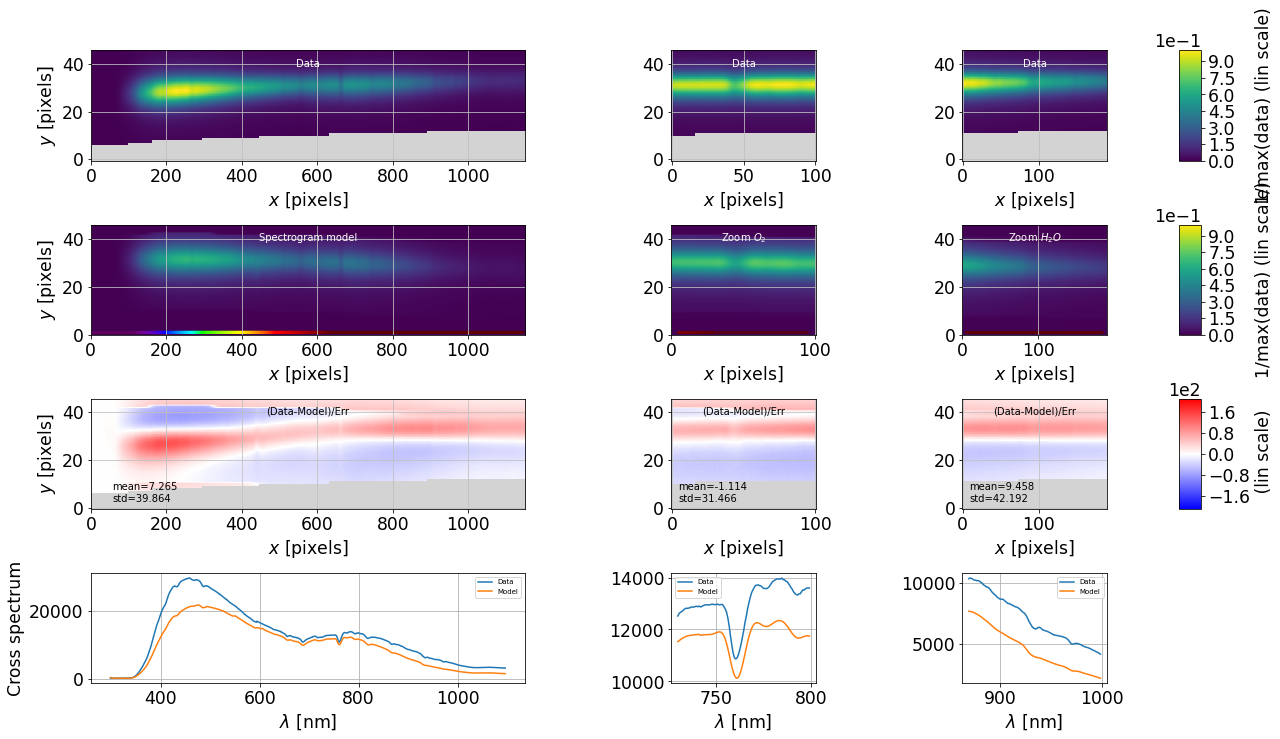

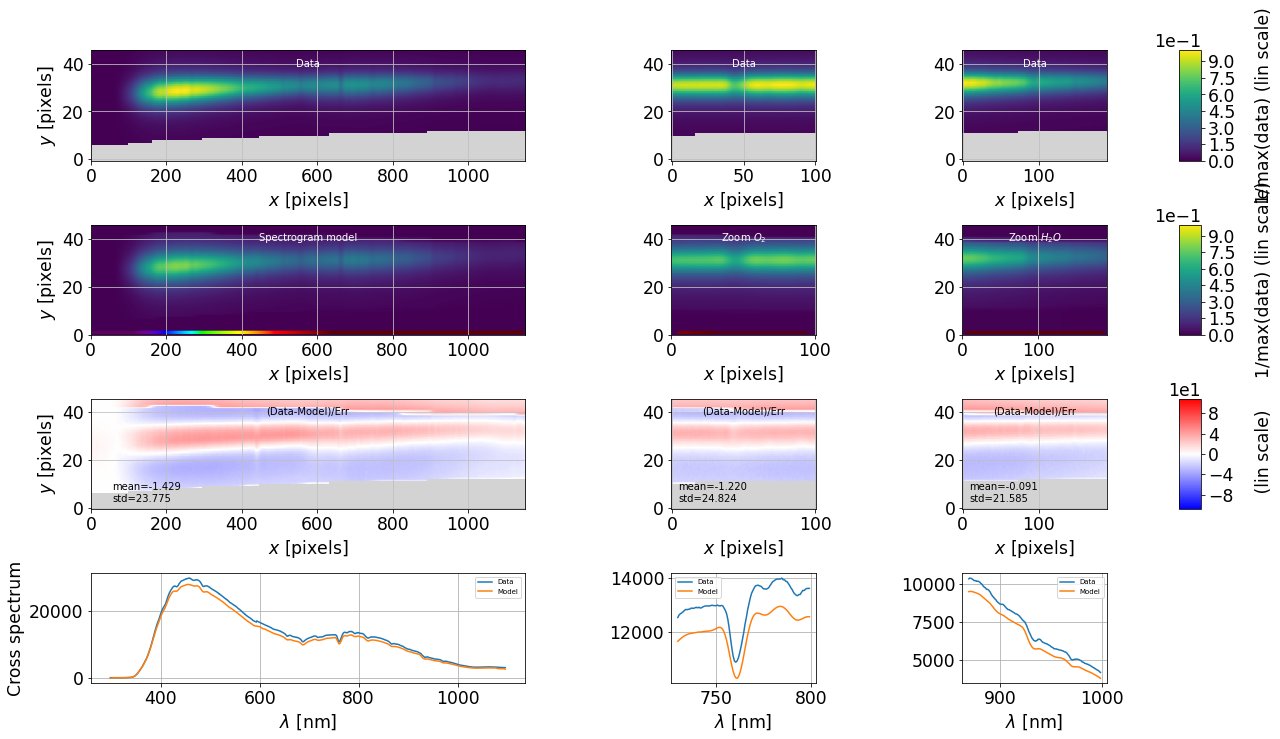

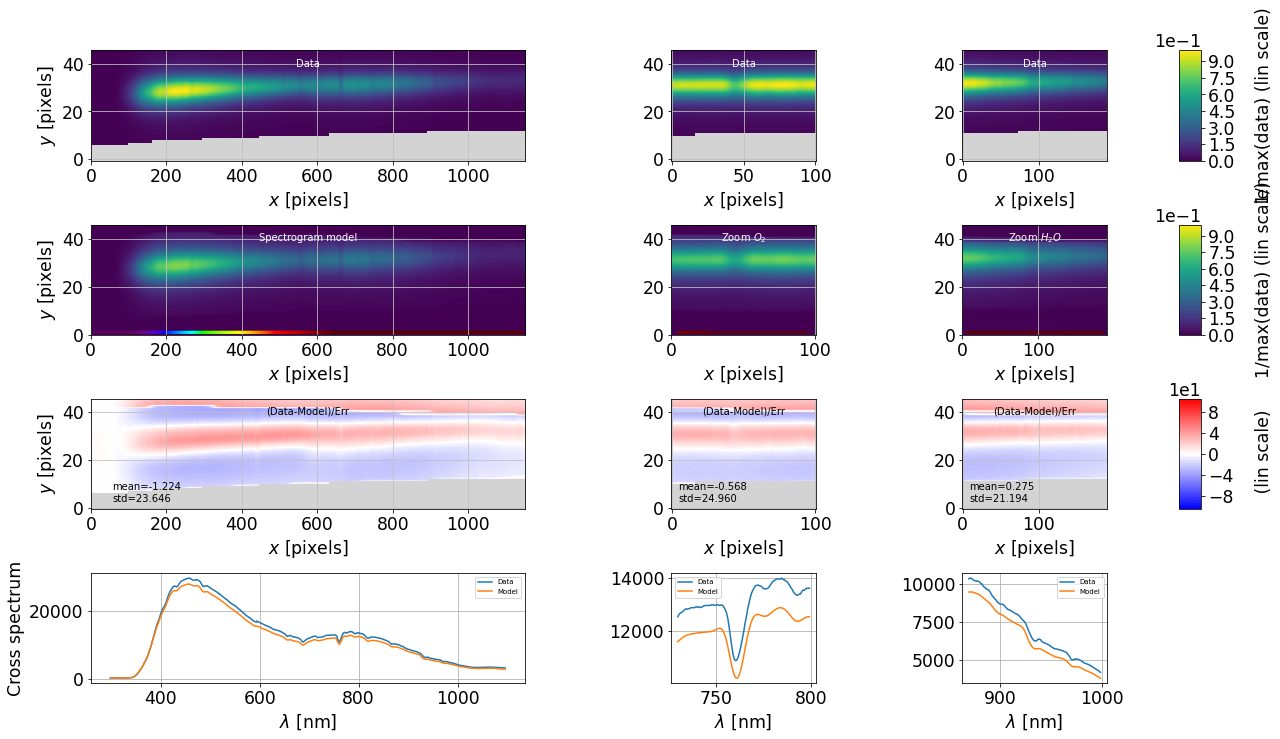

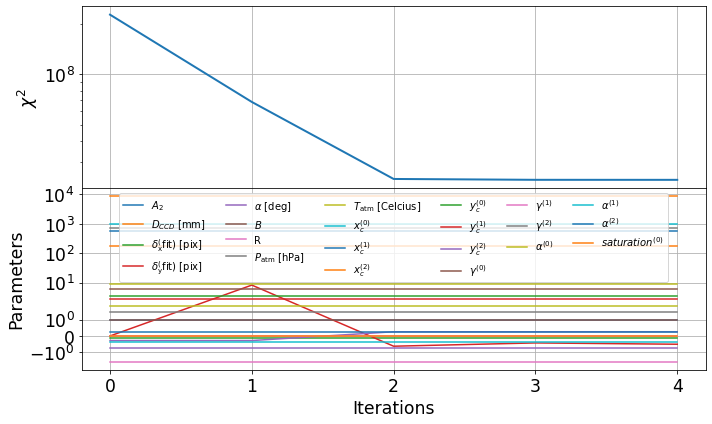

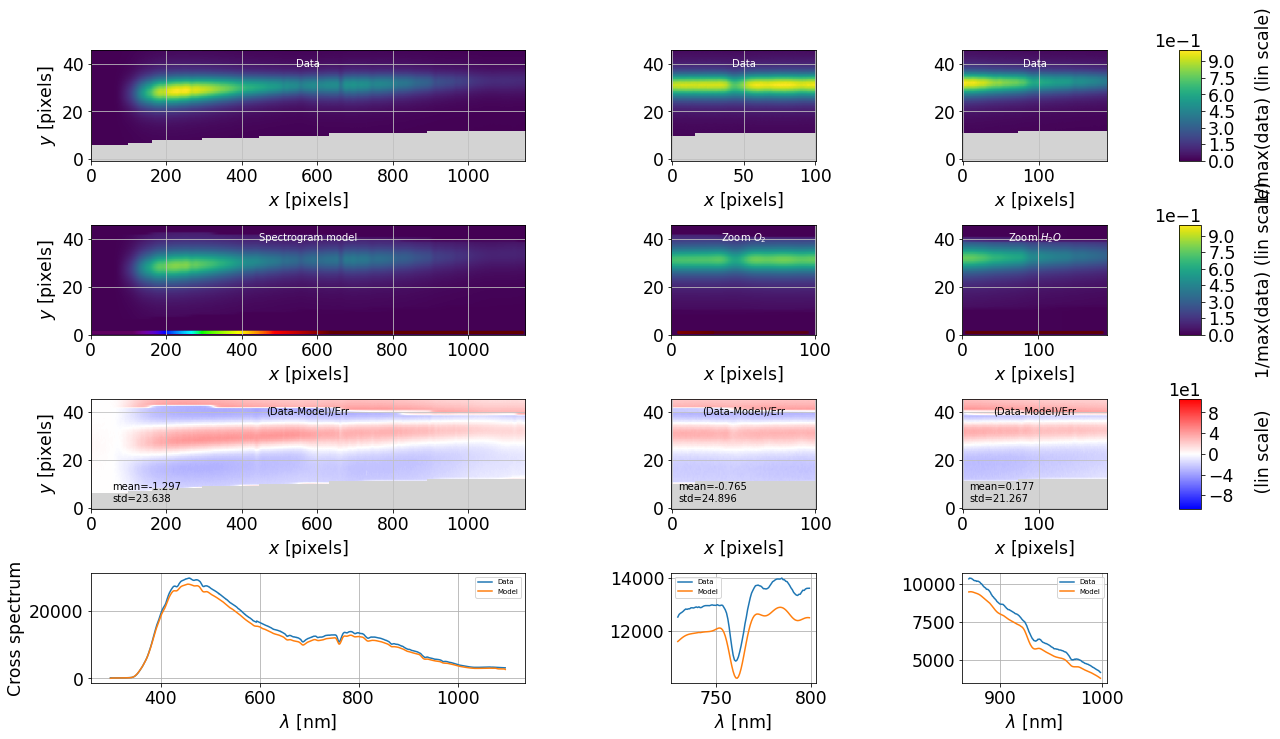

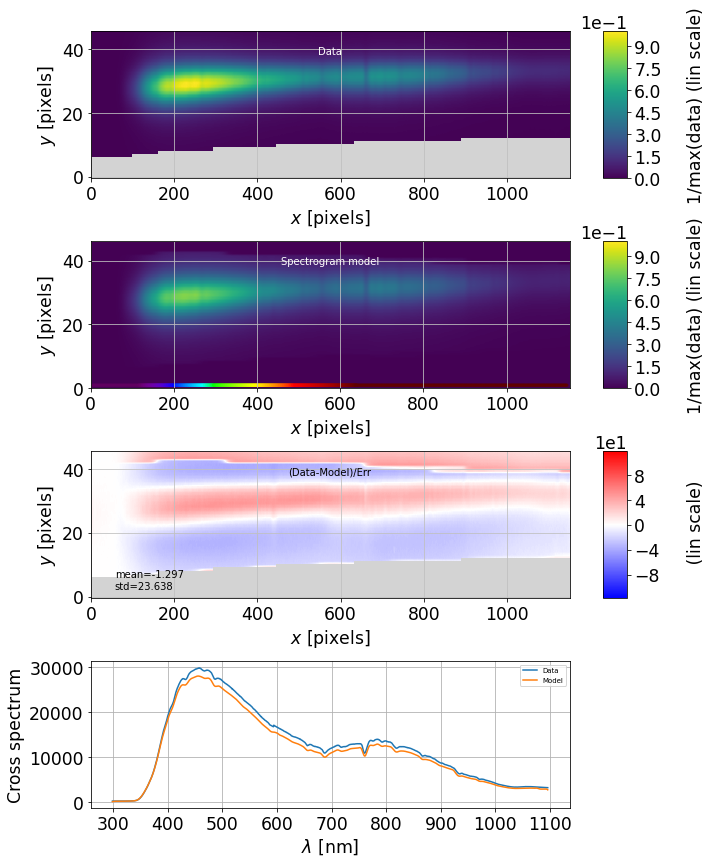

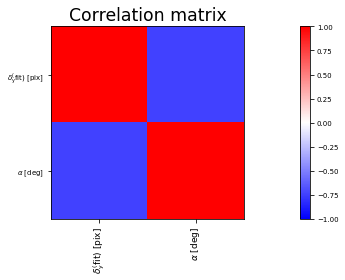

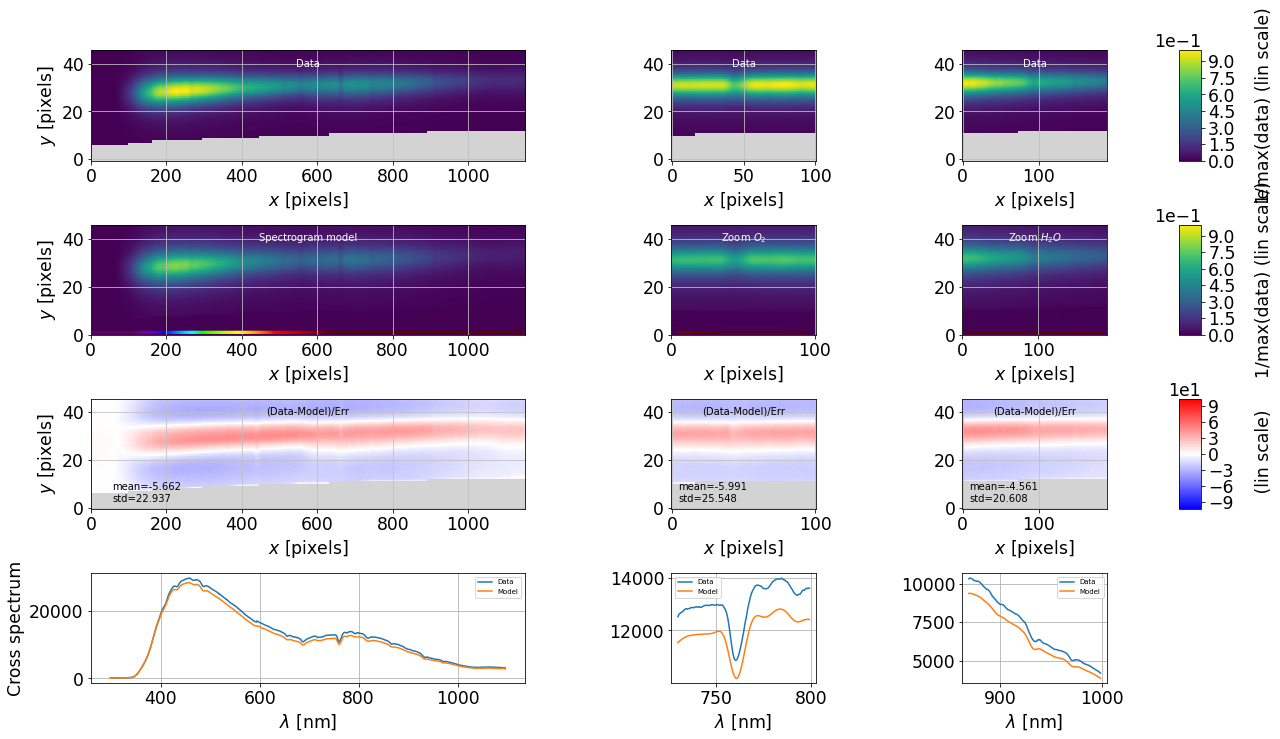

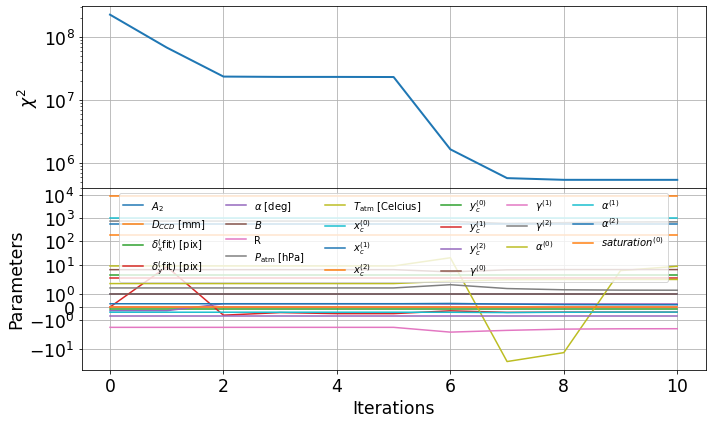

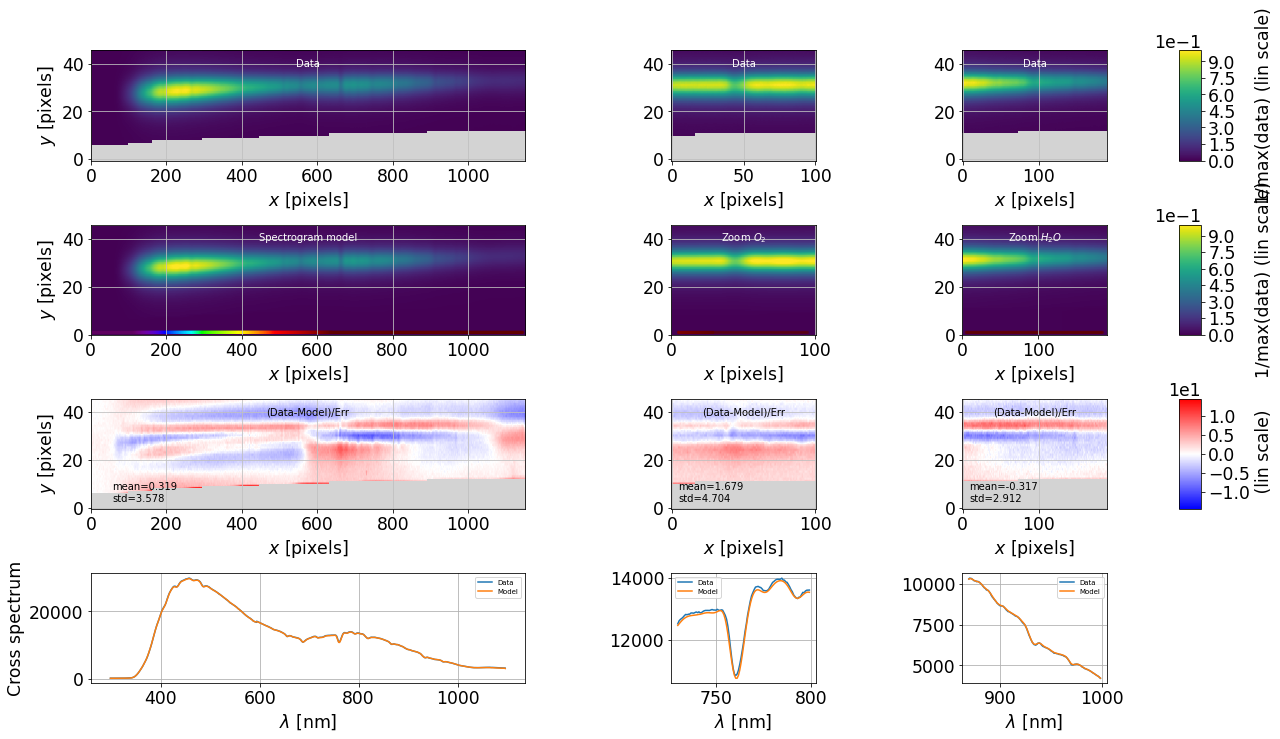

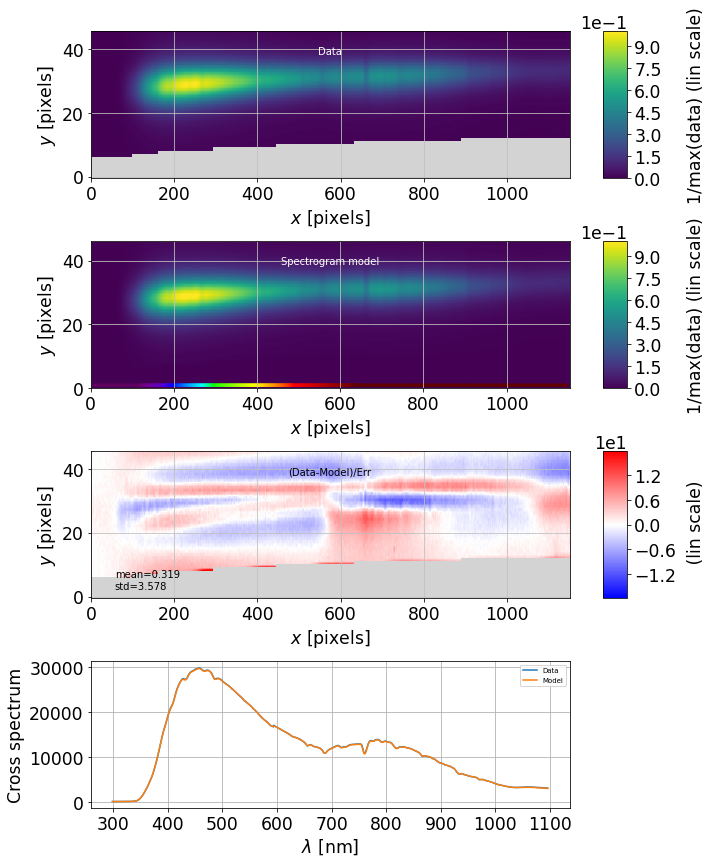

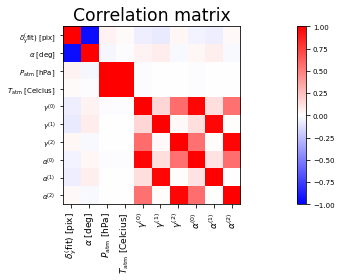

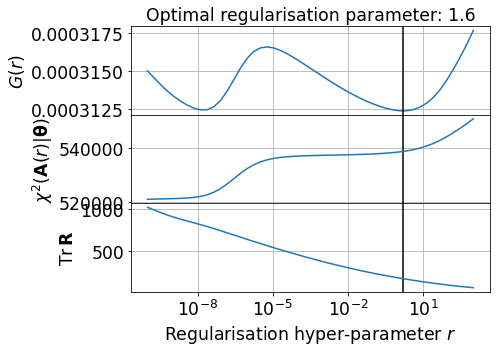

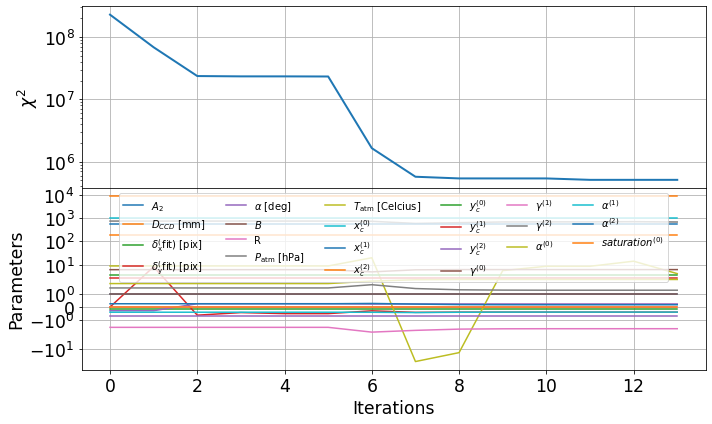

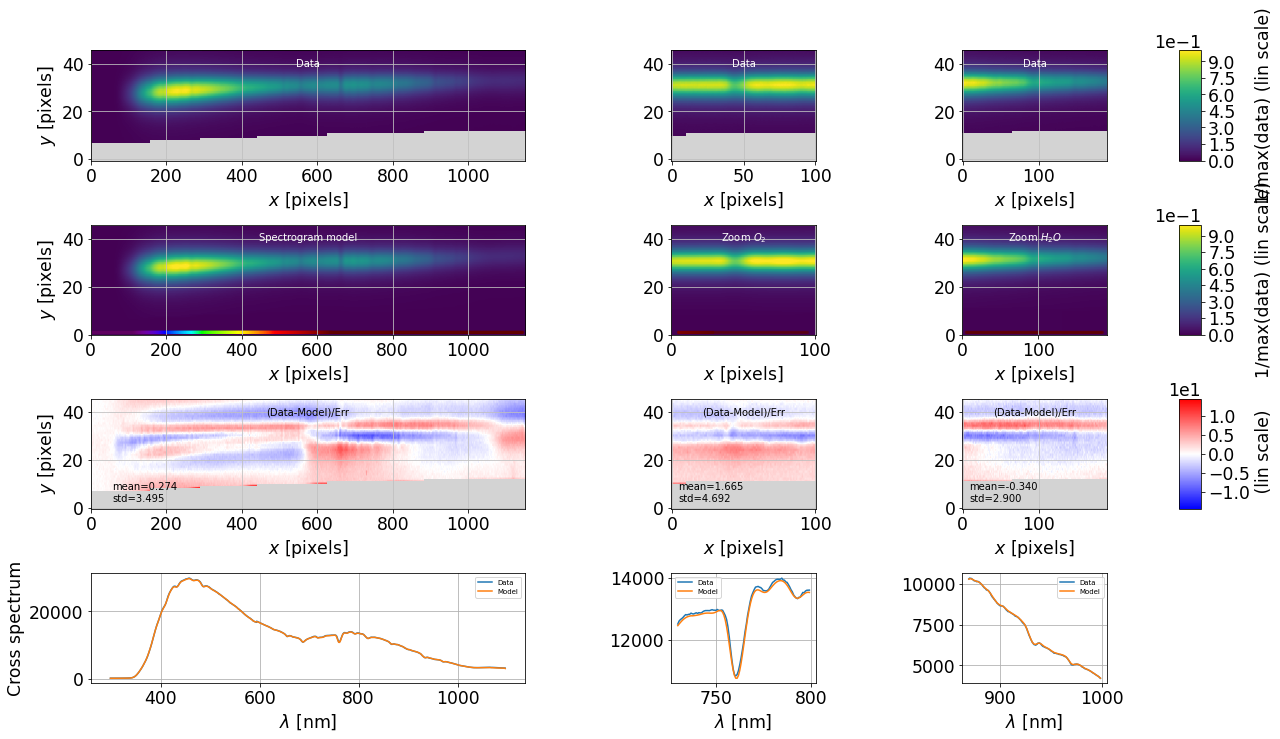

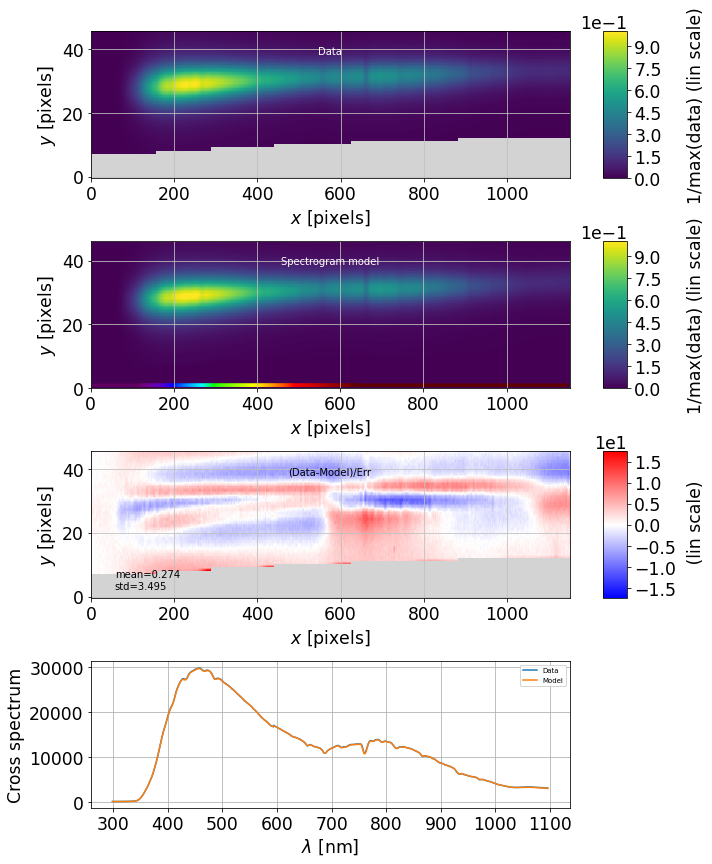

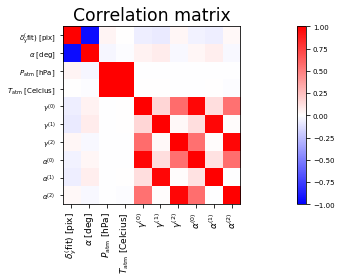

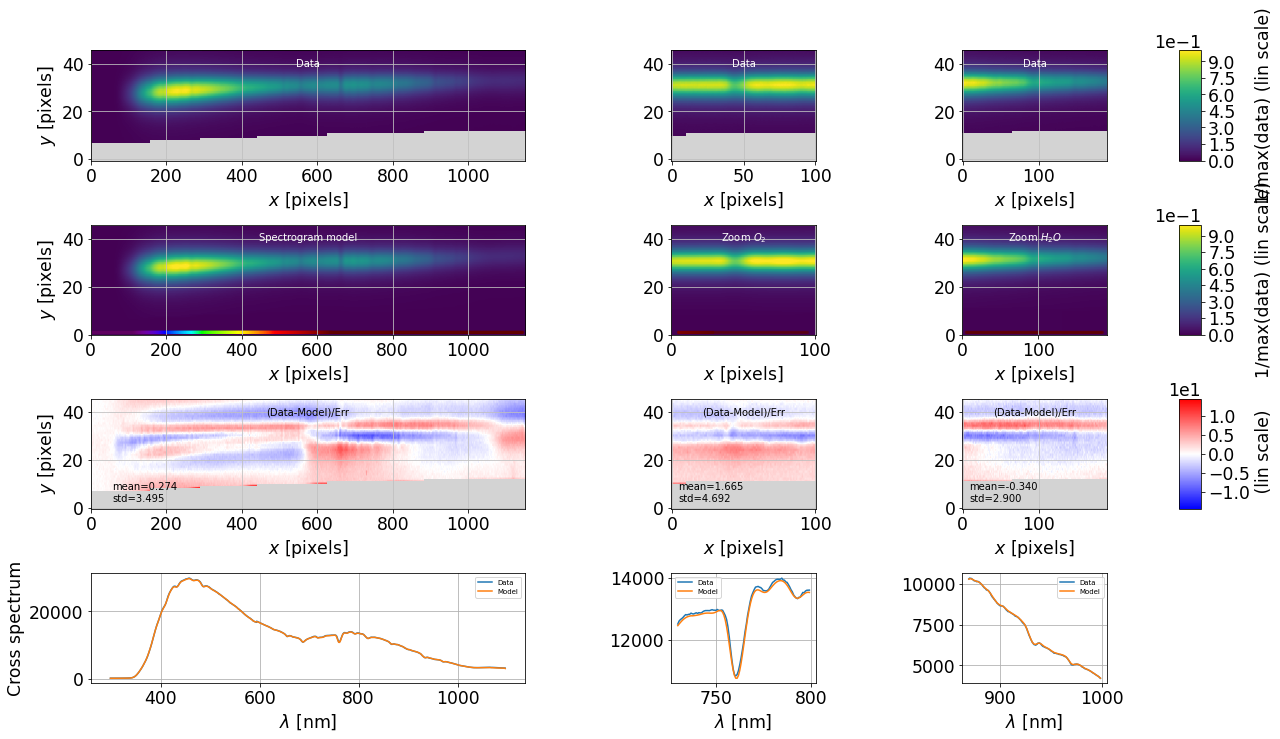

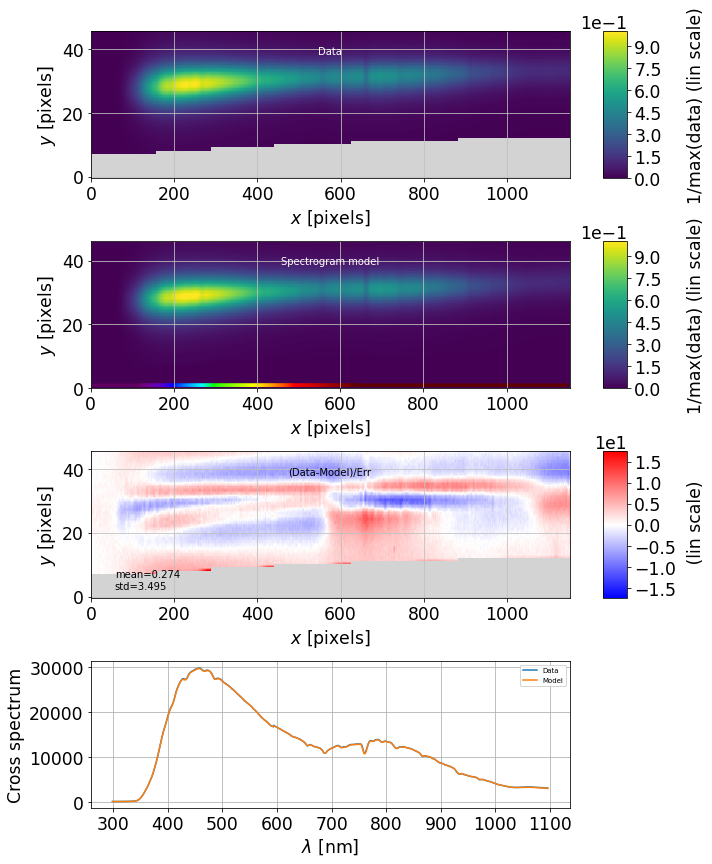

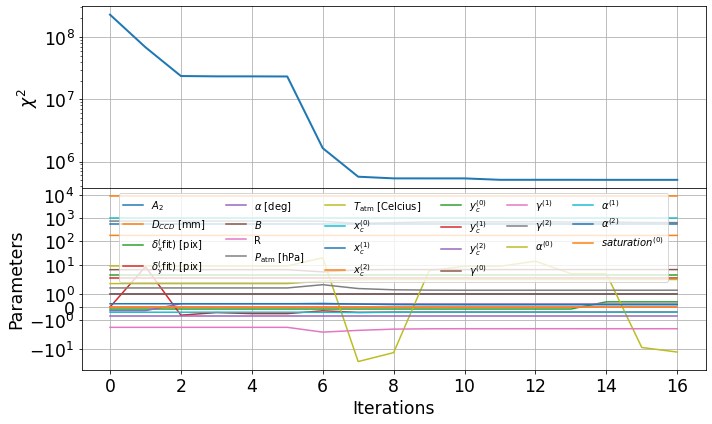

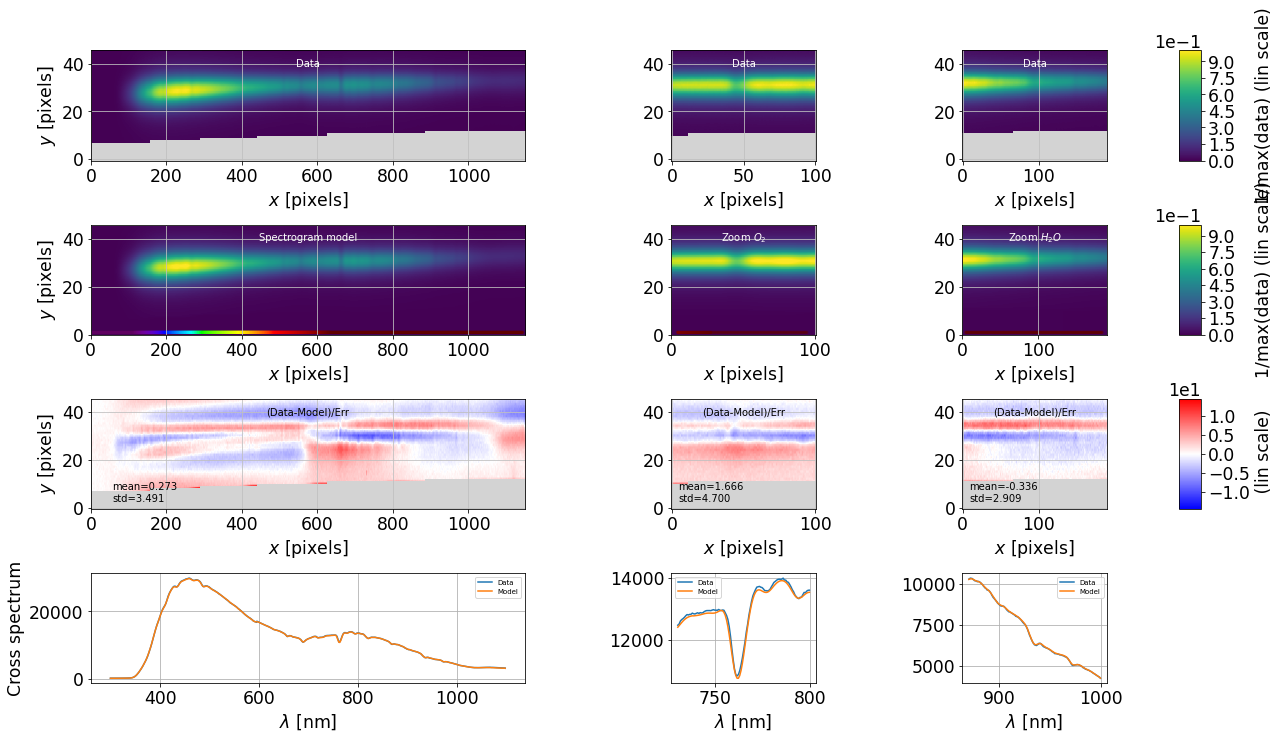

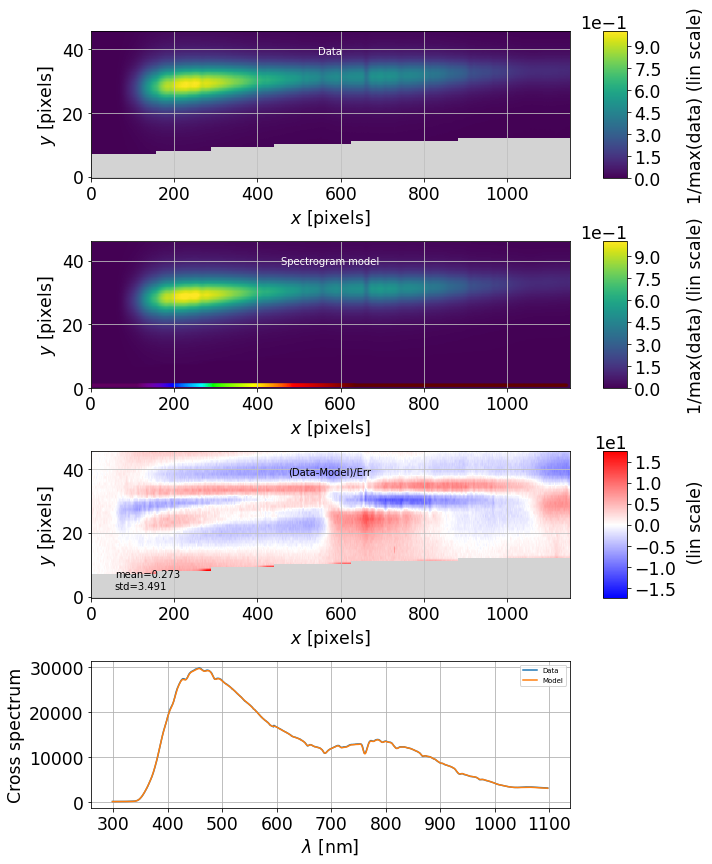

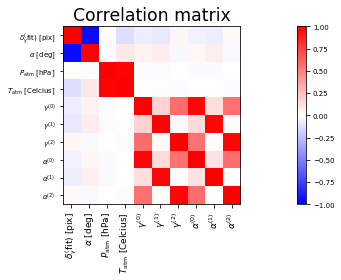

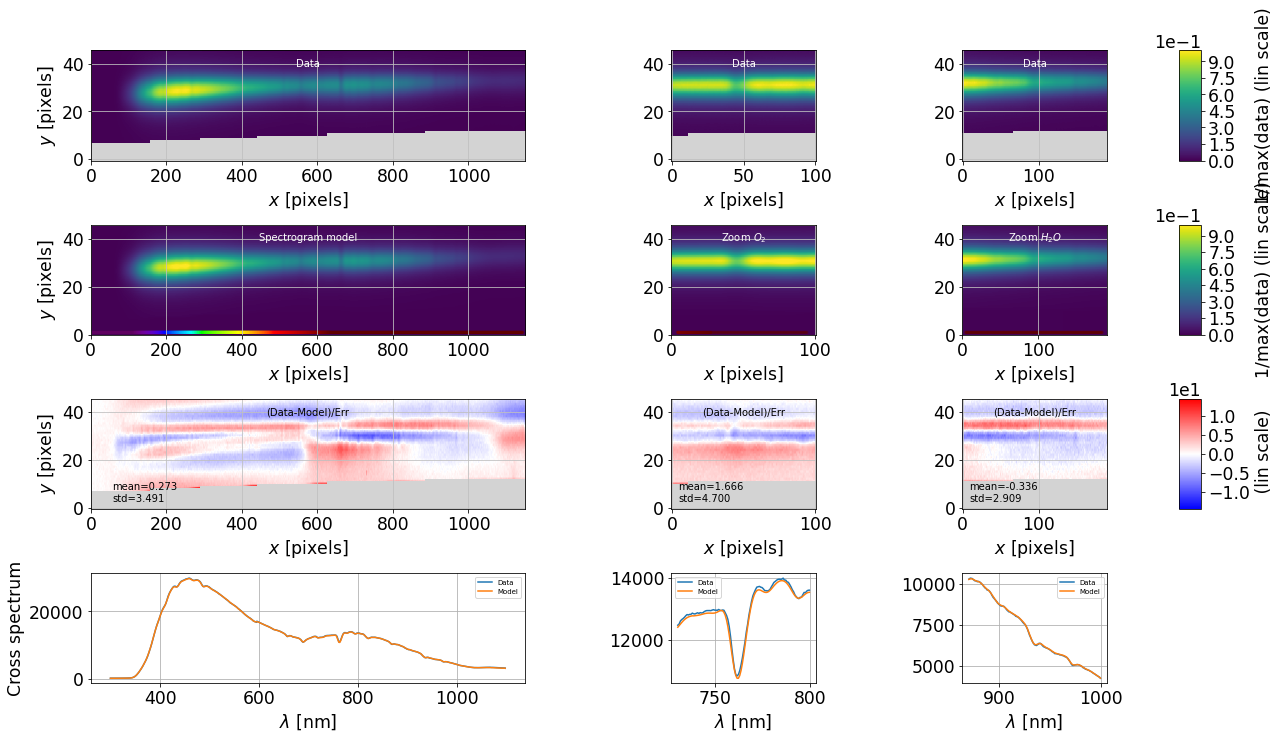

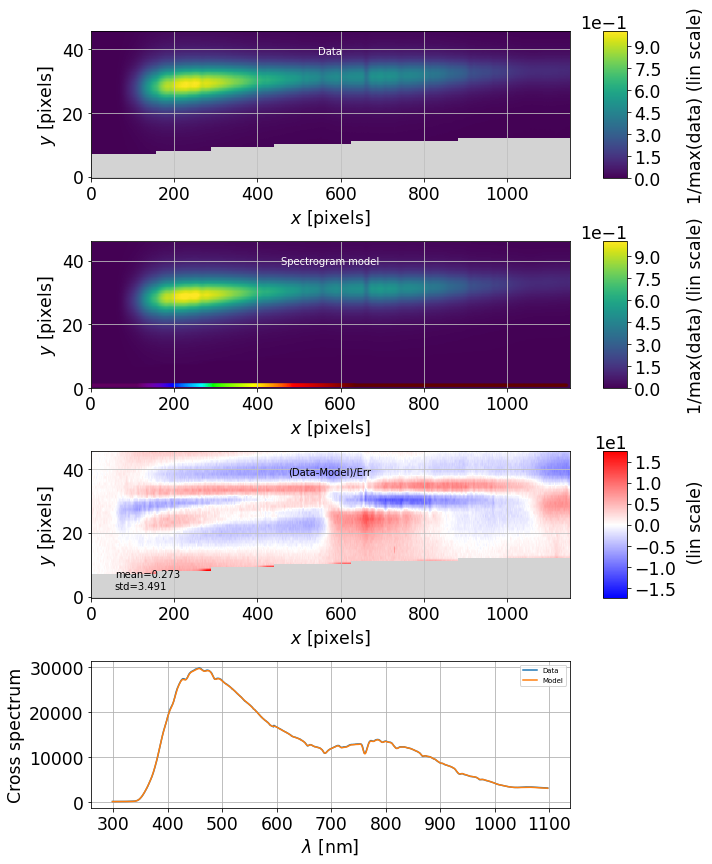

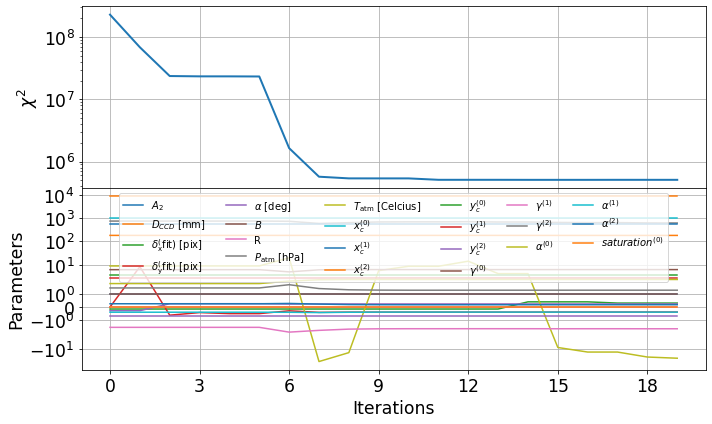

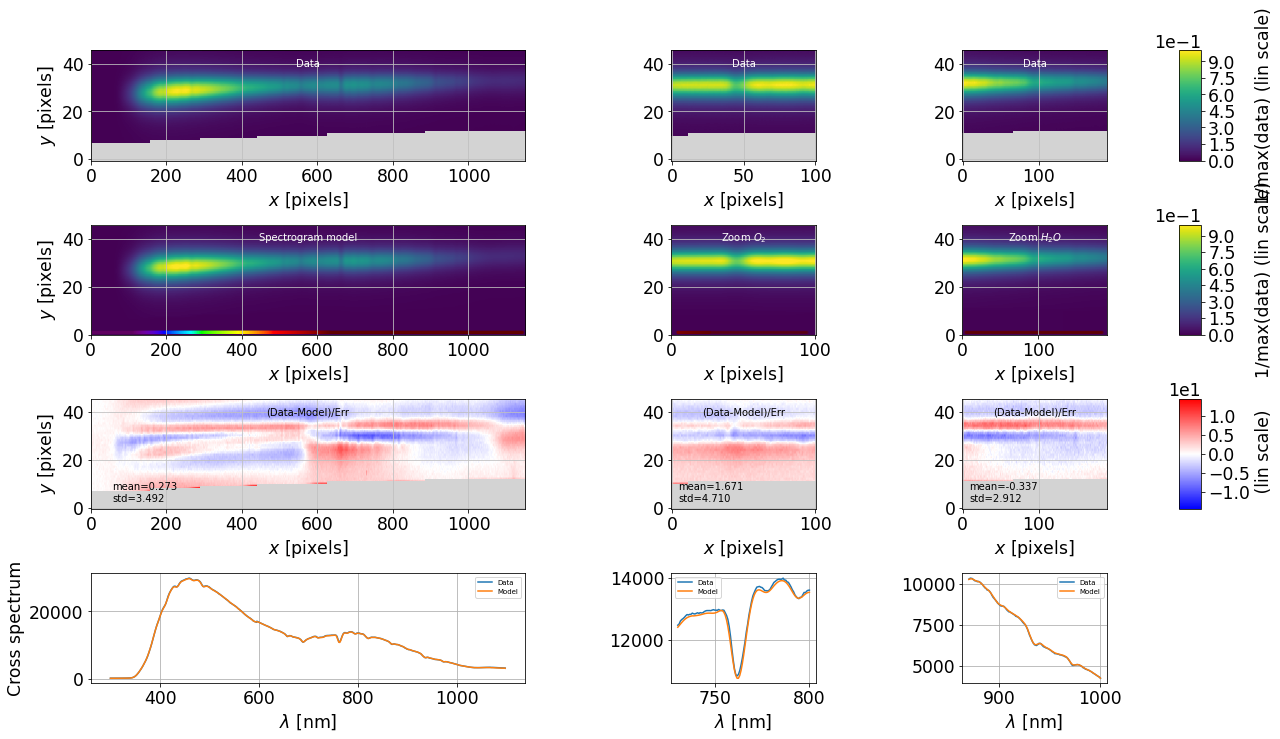

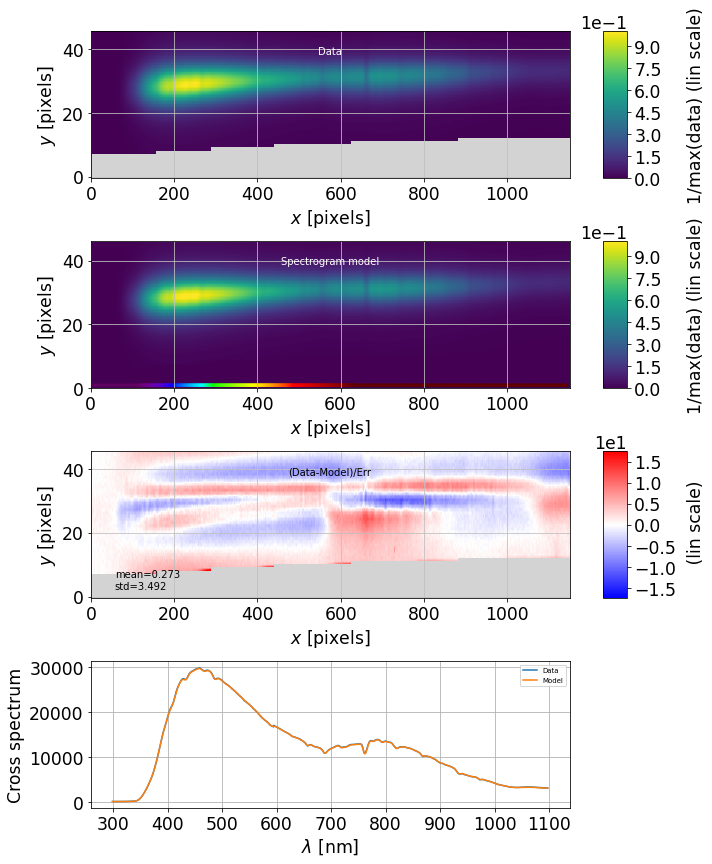

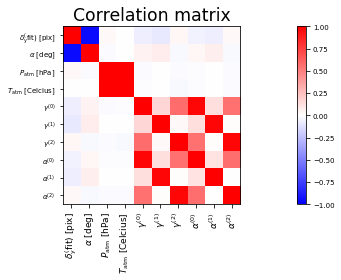

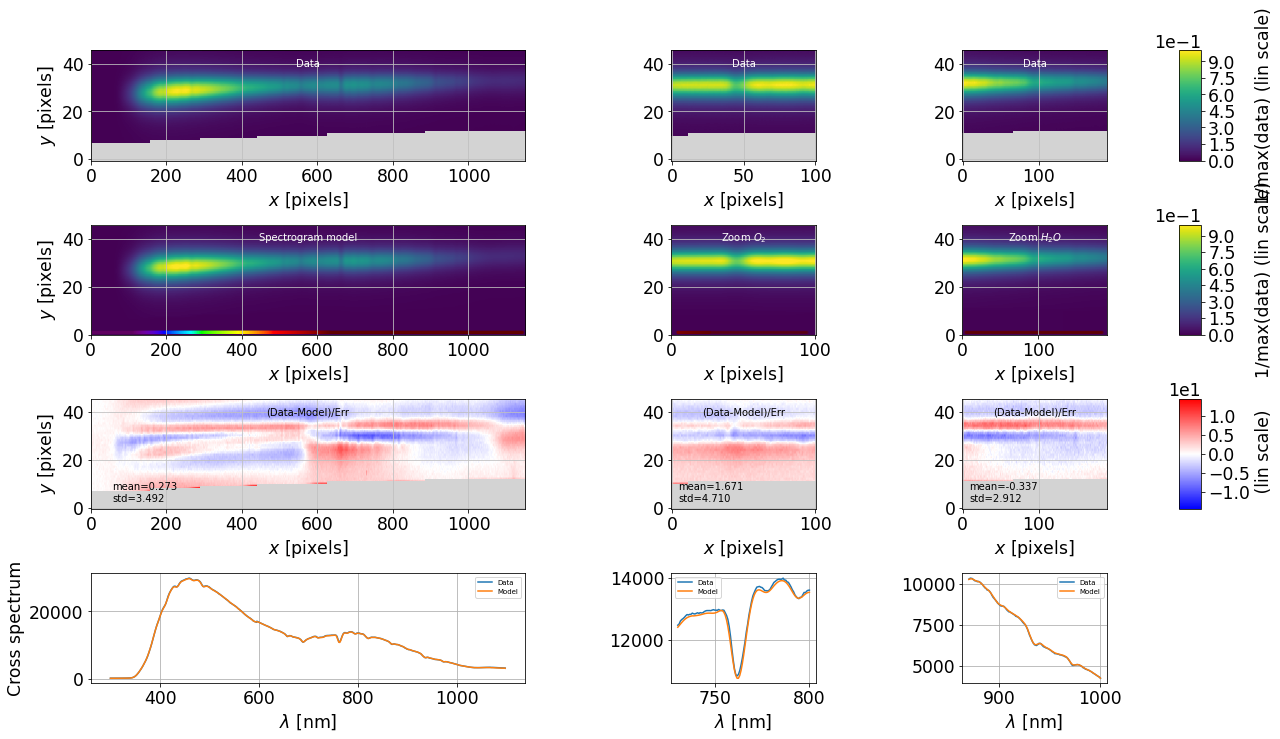

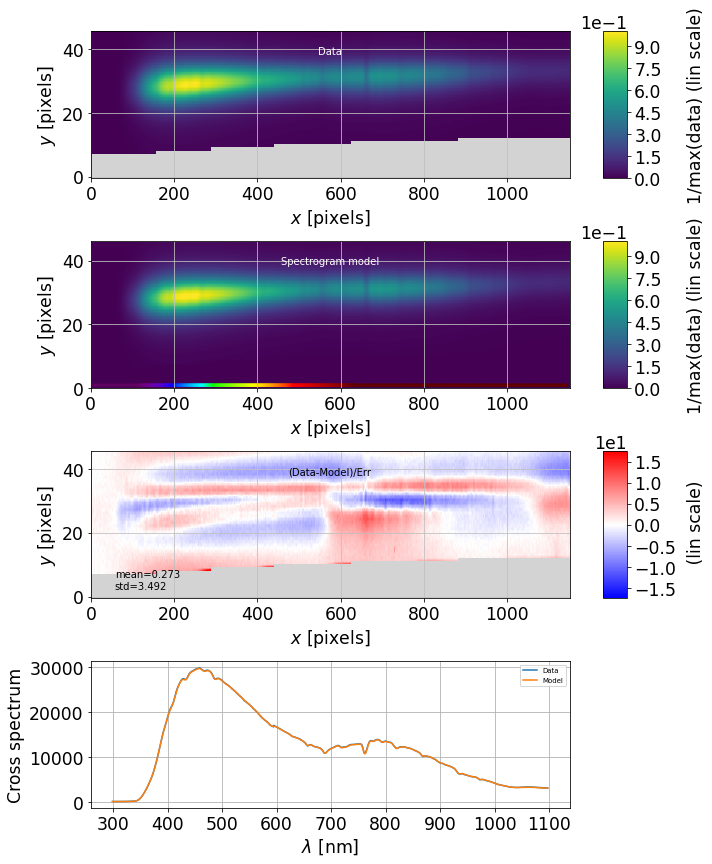

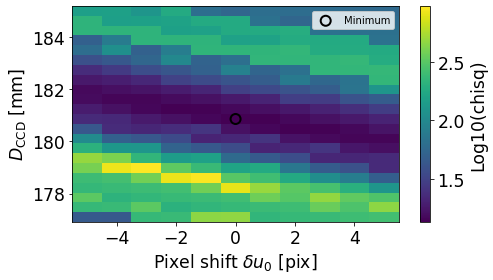

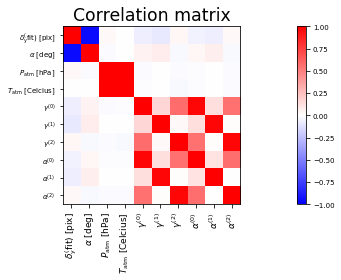

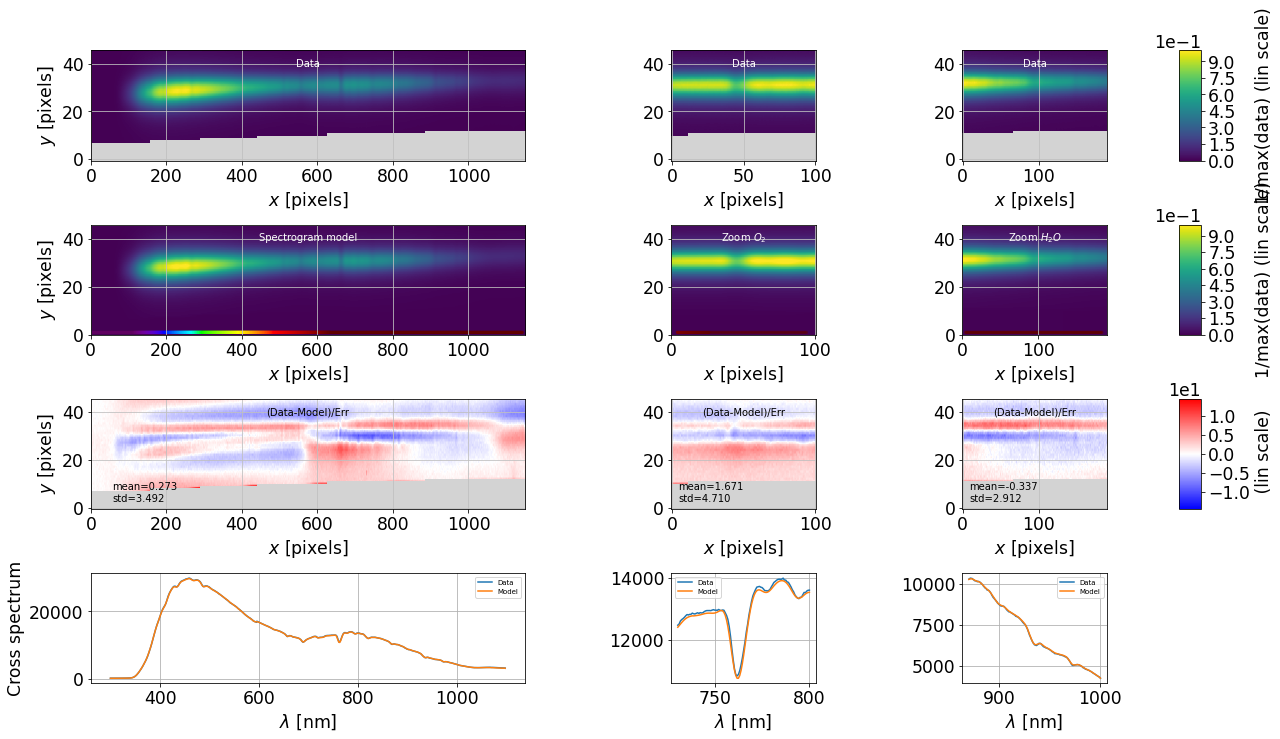

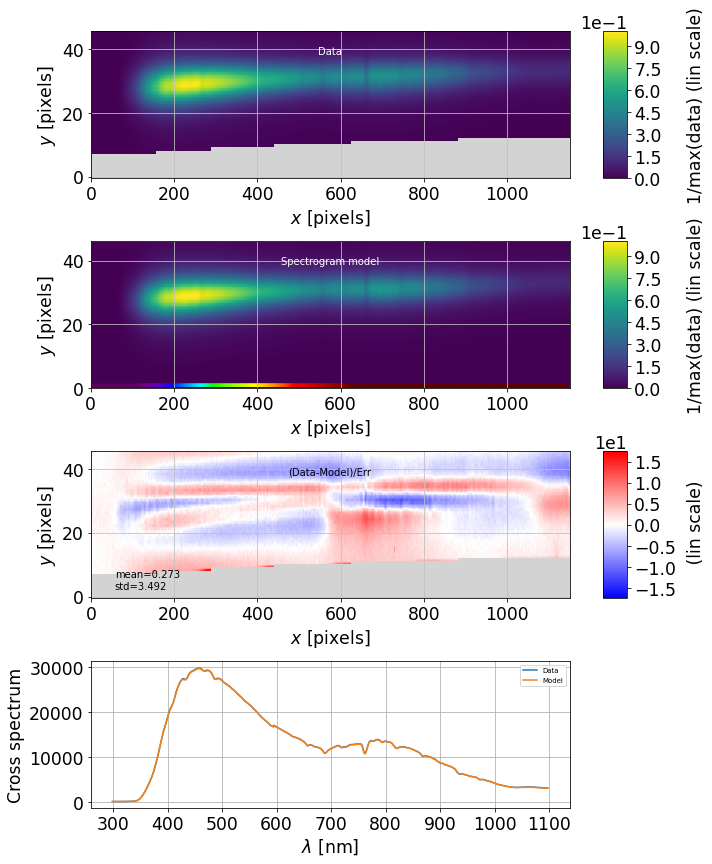

In [62]:
# increase the nulber of iteration
spectrum = run_ffm_minimisation(w, method="newton", niter=3)

In [63]:
showfitparameter(w)

0 :: A2 = 1.0
1 :: D_CCD [mm] = 180.8713260497973
2 :: shift_x [pix] = 0.3545798176892979
3 :: shift_y [pix] = -0.38291787805964006
4 :: angle [deg] = 0.23824329650568057
5 :: B = 1.0
6 :: R = 0.0
7 :: P [hPa] = 613.4316018476106
8 :: T [Celsius] = -23.998578983393937
9 :: x_c_0 = 999.1189912121253
10 :: x_c_1 = 575.4931279665329
11 :: x_c_2 = 0.0
12 :: y_c_0 = 3.574947098802857
13 :: y_c_1 = 2.73771583866332
14 :: y_c_2 = -0.7069567876125603
15 :: gamma_0 = 6.223332705830124
16 :: gamma_1 = -1.6732990736180575
17 :: gamma_2 = 1.3000454008314104
18 :: alpha_0 = 2.347339389936897
19 :: alpha_1 = -0.3900554037976603
20 :: alpha_2 = 0.17913551154024313
21 :: saturation_0 = 8499.687172396581


   Line   Tabulated  Detected ...   Chisq   Eqwidth_mod Eqwidth_data
              nm        nm    ...  reduced       nm          nm     
--------- --------- --------- ... --------- ----------- ------------
$H\delta$  410.3493 410.58942 ...   36.9093  0.44961482    0.5188594
 $Fe_{I}$  430.9468  432.2644 ...   36.9093  0.07974551   0.33093068
$H\gamma$   434.158 434.78885 ...   36.9093  0.22461183   0.41632277
 $Fe_{I}$ 438.51456 437.80264 ...   36.9093   0.1116805    0.4984304
 $He_{I}$ 447.26276 447.52496 ...   36.9093  0.21227123    0.7023976
 $H\beta$ 486.47702 486.85703 ...   36.9093  0.28299478   0.17213525
$H\alpha$  656.5389  656.2032 ... 18.422457  0.24948432   0.29551843
 $O_2(B)$   687.472 688.37134 ... 18.422457  0.77591753    0.7328808
              760.3 759.86646 ... 27.301592   0.9824656    3.0588872
    $O_2$     763.1   763.068 ... 27.301592   2.1433287    3.0774384
 $O_2(Z)$   822.696  818.1474 ... 25.089424   1.6011963    1.6309085
 $O_2(Y)$   898.765  899.2754 ... 

2022-07-08 11:55:47  astropy    _showwarning         WARNING UnitsWarning: 'reduced' did not parse as fits unit: At col 0, Unit 'reduced' not supported by the FITS standard.  If this is meant to be a custom unit, define it with 'u.def_unit'. To have it recognized inside a file reader or other code, enable it with 'u.add_enabled_units'. For details, see https://docs.astropy.org/en/latest/units/combining_and_defining.html


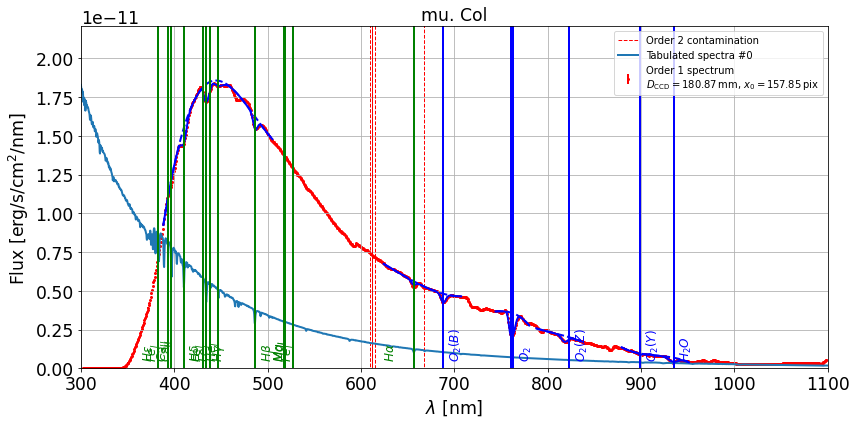

In [64]:
s.plot_spectrum(force_lines=True) 

In [65]:
s.lambdas

array([ 298.74619485,  299.45278557,  300.15936555, ..., 1097.28980281,
       1097.9679705 , 1098.6461004 ])

In [66]:
s.data_order2

array([-480.32210073, -431.79691484, -367.6784278 , ...,   56.59382644,
         59.40960666,   60.47396094])

Text(0.5, 1.0, 'Order 2')

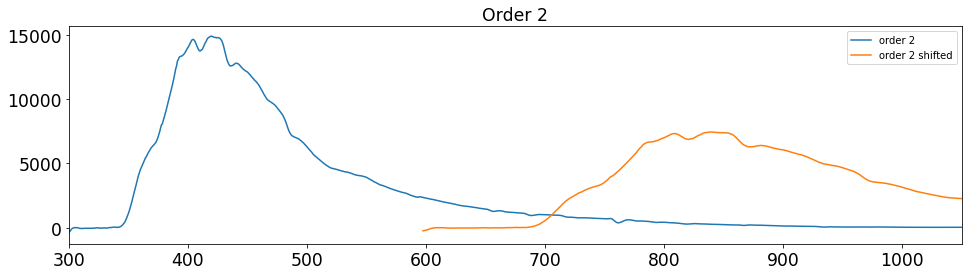

In [67]:
plt.plot(s.lambdas,s.data_order2,label="order 2")
plt.plot(2*s.lambdas,s.data_order2/2,label="order 2 shifted")
plt.xlim(300,1050)
plt.legend()
plt.title("Order 2")

Text(0.5, 1.0, 'Order 1')

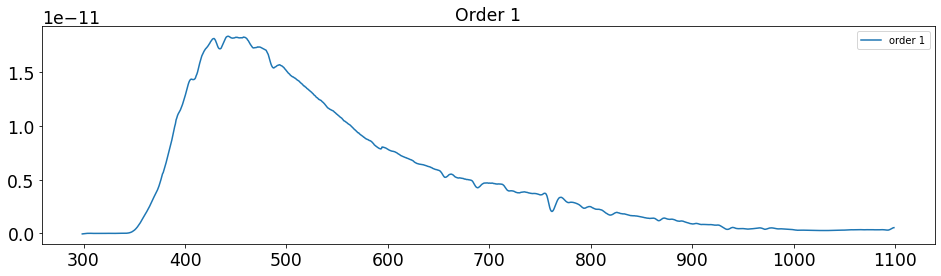

In [68]:
plt.plot(s.lambdas,s.data,label="order 1")
plt.legend()
plt.title("Order 1")